# Récapitulatif de la démarche et de son contexte 

Une entreprise agroalimentaire, la Poule qui Chante, souhaite s'implanter à l'international.

J'ai été mandatée pour effectuer un premier groupement de pays où nous pourrions exporter nos poulets, grâce en autre à une analyse PESTEL.

Pour ce faire, nous utiliserons les données suivantes :
 - la disponibilité alimentaire des pays
 - leur population
 - leur PIB
 - leur index de stabilité politique

Ce notebook représentera la première partie des analyses.
On y retrouvera :
- le nettoyage des données et leurs jointures
- les analyses de l'évolution des données de la France pour servir de modèle plus tard
- les top 10 des pays ayant le meilleur PIB, index de stabilité politique et la plus forte population
- les analyses exploratoires des données

# Nettoyage des données

## Import des différentes librairies utilisées

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Disponibilité alimentaire 2020

Notre premier jeu de données concerne la disponibilité alimentaire des différents pays pour l'année 2020.

On y retrouvera notament le nom des différents produits ainsi que les différentes utilisations de ceux-ci.

La variable Value représente la quantité de produits concernés, elle est fournie en milliers de tonnes.

In [2]:
dispo= pd.read_csv('FAOSTAT_data_en_4-5-2023.csv')
dispo

,Domain,Area,Element,Item,Year,Value
0,Food Balances (2010-),Afghanistan,Production,Wheat and products,2020,5185.00
1,Food Balances (2010-),Afghanistan,Import Quantity,Wheat and products,2020,2741.00
2,Food Balances (2010-),Afghanistan,Stock Variation,Wheat and products,2020,496.00
3,Food Balances (2010-),Afghanistan,Export Quantity,Wheat and products,2020,0.00
4,Food Balances (2010-),Afghanistan,Domestic supply quantity,Wheat and products,2020,7429.00
...,...,...,...,...,...,...
235093,Food Balances (2010-),Zimbabwe,Food supply (kcal),Miscellaneous,2020,5869.98
235094,Food Balances (2010-),Zimbabwe,Protein supply quantity (g/capita/day),Miscellaneous,2020,0.03
235095,Food Balances (2010-),Zimbabwe,Protein supply quantity (g),Miscellaneous,2020,171.80
235096,Food Balances (2010-),Zimbabwe,Fat supply quantity (g/capita/day),Miscellaneous,2020,0.01


Nous commençons par garder les variables qui nous interessent.

In [3]:
dispo = dispo.loc[:,['Area','Element','Item','Value']]
dispo

,Area,Element,Item,Value
0,Afghanistan,Production,Wheat and products,5185.00
1,Afghanistan,Import Quantity,Wheat and products,2741.00
2,Afghanistan,Stock Variation,Wheat and products,496.00
3,Afghanistan,Export Quantity,Wheat and products,0.00
4,Afghanistan,Domestic supply quantity,Wheat and products,7429.00
...,...,...,...,...
235093,Zimbabwe,Food supply (kcal),Miscellaneous,5869.98
235094,Zimbabwe,Protein supply quantity (g/capita/day),Miscellaneous,0.03
235095,Zimbabwe,Protein supply quantity (g),Miscellaneous,171.80
235096,Zimbabwe,Fat supply quantity (g/capita/day),Miscellaneous,0.01


In [4]:
dispo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235098 entries, 0 to 235097
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Area     235098 non-null  object 
 1   Element  235098 non-null  object 
 2   Item     235098 non-null  object 
 3   Value    235098 non-null  float64
dtypes: float64(1), object(3)
memory usage: 7.2+ MB


Cette commande nous permet de constater qu'il n'y a aucune valeur nulle et également de constater les types des variables de la dataframe.

Pour ces dernières, il n'y a aucun changement à faire.

La prochaine commande nous indiquera si notre dataframe contient des doublons pour que l'on puisse par la suite les supprimer.

In [5]:
dispo.duplicated().sum()

0

Pour faciliter la compréhension ainsi que les futures jointures, nous allons renommer deux des variables retenues.

In [6]:
dispo = dispo.rename(columns = {'Area':'Country','Value':'Quantity'})
dispo

,Country,Element,Item,Quantity
0,Afghanistan,Production,Wheat and products,5185.00
1,Afghanistan,Import Quantity,Wheat and products,2741.00
2,Afghanistan,Stock Variation,Wheat and products,496.00
3,Afghanistan,Export Quantity,Wheat and products,0.00
4,Afghanistan,Domestic supply quantity,Wheat and products,7429.00
...,...,...,...,...
235093,Zimbabwe,Food supply (kcal),Miscellaneous,5869.98
235094,Zimbabwe,Protein supply quantity (g/capita/day),Miscellaneous,0.03
235095,Zimbabwe,Protein supply quantity (g),Miscellaneous,171.80
235096,Zimbabwe,Fat supply quantity (g/capita/day),Miscellaneous,0.01


In [7]:
sorted(dispo['Item'].unique().tolist())

['Alcohol, Non-Food',
 'Apples and products',
 'Aquatic Animals, Others',
 'Aquatic Plants',
 'Bananas',
 'Barley and products',
 'Beans',
 'Beer',
 'Beverages, Alcoholic',
 'Beverages, Fermented',
 'Bovine Meat',
 'Butter, Ghee',
 'Cassava and products',
 'Cephalopods',
 'Cereals, Other',
 'Citrus, Other',
 'Cloves',
 'Cocoa Beans and products',
 'Coconut Oil',
 'Coconuts - Incl Copra',
 'Coffee and products',
 'Cottonseed',
 'Cottonseed Oil',
 'Cream',
 'Crustaceans',
 'Dates',
 'Demersal Fish',
 'Eggs',
 'Fats, Animals, Raw',
 'Fish, Body Oil',
 'Fish, Liver Oil',
 'Freshwater Fish',
 'Fruits, other',
 'Grapefruit and products',
 'Grapes and products (excl wine)',
 'Groundnut Oil',
 'Groundnuts',
 'Honey',
 'Infant food',
 'Lemons, Limes and products',
 'Maize Germ Oil',
 'Maize and products',
 'Marine Fish, Other',
 'Meat, Aquatic Mammals',
 'Meat, Other',
 'Milk - Excluding Butter',
 'Millet and products',
 'Miscellaneous',
 'Molluscs, Other',
 'Mutton & Goat Meat',
 'Nuts and pro

Nous avons précedemment listé les différents produits répertoriés dans la dataframe pour vérifier que cela concerne bien les produits agroalimentaires.

Nous allons donc supprimer deux produits :
 - les graines de coton qui contiennent une molécule toxique, les rendant impropres à la consommation
 - les alcools répertoriés comme "Non-Food"

In [8]:
dispo.drop(dispo.loc[dispo['Item'] == 'Cottonseed'].index, inplace=True)
dispo.drop(dispo.loc[dispo['Item'] == 'Alcohol, Non-Food'].index, inplace=True)
dispo

,Country,Element,Item,Quantity
0,Afghanistan,Production,Wheat and products,5185.00
1,Afghanistan,Import Quantity,Wheat and products,2741.00
2,Afghanistan,Stock Variation,Wheat and products,496.00
3,Afghanistan,Export Quantity,Wheat and products,0.00
4,Afghanistan,Domestic supply quantity,Wheat and products,7429.00
...,...,...,...,...
235093,Zimbabwe,Food supply (kcal),Miscellaneous,5869.98
235094,Zimbabwe,Protein supply quantity (g/capita/day),Miscellaneous,0.03
235095,Zimbabwe,Protein supply quantity (g),Miscellaneous,171.80
235096,Zimbabwe,Fat supply quantity (g/capita/day),Miscellaneous,0.01


Pour faciliter toutes analyses futures, nous allons créer des groupes de produits :
 - les céréales
 - les sucres
 - les produits issus des plantes
 - les produits issus des animaux
 - les autres 

In [9]:
cereales  = ['Barley and products','Cereals, Other','Maize and products','Millet and products','Oats','Rice and products',
            'Rye and products','Sorghum and products','Wheat and products']

In [10]:
edulcorants = ['Honey','Sugar (Raw Equivalent)','Sugar beet','Sugar cane','Sugar non-centrifugal','Sweeteners, Other']

In [11]:
prod_veg = ['Apples and products','Bananas','Citrus, Other','Coconuts - Incl Copra','Dates','Fruits, other',
          'Grapefruit and products','Grapes and products (excl wine)','Groundnuts','Lemons, Limes and products',
          'Nuts and products','Olives (including preserved)','Pimento','Pineapples and products','Plantains',
          'Tomatoes and products','Cocoa Beans and products','Coffee and products','Palm kernels','Rape and Mustardseed',
          'Sesame seed','Sunflower seed','Beans','Cassava and products','Onions','Peas','Potatoes and products',
          'Pulses, Other and products','Roots, Other','Soyabeans','Sweet potatoes','Vegetables, other','Yams',
            'Oranges, Mandarines','Aquatic Plants','Oilcrops, Other','Coconut Oil','Cottonseed Oil','Groundnut Oil',
            'Maize Germ Oil','Oilcrops Oil, Other','Olive Oil','Palm Oil','Palmkernel Oil','Rape and Mustard Oil',
            'Ricebran Oil','Sesameseed Oil','Soyabean Oil','Sunflowerseed Oil']

In [12]:
prod_animaliers = ['Bovine Meat','Butter, Ghee','Cream','Eggs','Fats, Animals, Raw','Meat, Other','Meat, Aquatic Mammals',
                   'Milk - Excluding Butter','Mutton & Goat Meat','Offals, Edible','Pigmeat','Poultry Meat',
                   'Aquatic Animals, Others','Cephalopods','Crustaceans','Demersal Fish','Fish, Body Oil','Fish, Liver Oil',
                   'Freshwater Fish','Marine Fish, Other','Molluscs, Other','Pelagic Fish']

In [13]:
autres = ['Infant food','Miscellaneous','Cloves','Pepper','Spices, Other','Beer',
          'Beverages, Alcoholic','Beverages, Fermented','Tea (including mate)','Wine']

Nous allons maintenant passer aux différents types d'utilisation de produits pour ici également ne garder que ce dont nous aurons besoin, comme la production, l'import/export et la nourriture.

In [14]:
dispo['Element'].unique().tolist()

['Production',
 'Import Quantity',
 'Stock Variation',
 'Export Quantity',
 'Domestic supply quantity',
 'Feed',
 'Seed',
 'Losses',
 'Residuals',
 'Food',
 'Food supply quantity (kg/capita/yr)',
 'Food supply (kcal/capita/day)',
 'Food supply (kcal)',
 'Protein supply quantity (g/capita/day)',
 'Protein supply quantity (g)',
 'Fat supply quantity (g/capita/day)',
 'Fat supply quantity (g)',
 'Other uses (non-food)',
 'Processing']

In [15]:
def del_line(df,liste):
    for element in liste:
        df.drop(df.loc[df['Element']==element].index,inplace=True)

In [16]:
no_need =['Stock Variation','Domestic supply quantity','Seed','Losses','Residuals','Food supply quantity (kg/capita/yr)',
          'Food supply (kcal/capita/day)','Food supply (kcal)','Protein supply quantity (g/capita/day)',
          'Protein supply quantity (g)','Fat supply quantity (g/capita/day)','Fat supply quantity (g)','Other uses (non-food)',
          'Processing','Feed']

In [17]:
del_line(dispo,no_need)

Nous allons maintenant vérifier l'orthographe des différents pays présents dans cette dataframe.

In [18]:
dispo['Country'].unique().tolist()

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'China, Hong Kong SAR',
 'China, Macao SAR',
 'China, mainland',
 'China, Taiwan Province of',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Côte d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'French Polynesia',
 'Gabon',
 'Gambia',
 'Georgia',


Nous allons maintenant observer le cas un peu particulier de la Chine ainsi que de ses différentes provinces à travers un exemple nous montrant le blé et ses différentes utilisations.

In [19]:
dispo[((dispo['Country']=='China, mainland')|(dispo['Country']=='China')|(dispo['Country']=='China, Hong Kong SAR')|
     (dispo['Country']=='China, Macao SAR')|(dispo['Country']=='China, Taiwan Province of'))&(dispo['Item']=='Wheat and products')]

,Country,Element,Item,Quantity
41708,China,Production,Wheat and products,134278.0
41709,China,Import Quantity,Wheat and products,10773.0
41711,China,Export Quantity,Wheat and products,722.0
41719,China,Food,Wheat and products,97001.0
43218,"China, Hong Kong SAR",Production,Wheat and products,0.0
43219,"China, Hong Kong SAR",Import Quantity,Wheat and products,455.0
43221,"China, Hong Kong SAR",Export Quantity,Wheat and products,69.0
43227,"China, Hong Kong SAR",Food,Wheat and products,372.0
44486,"China, Macao SAR",Production,Wheat and products,0.0
44487,"China, Macao SAR",Import Quantity,Wheat and products,31.0


Nous pouvons comprendre rapidement que nous avons un type différent de "doublons", en effet 'China' représente la Chine ainsi que toutes ses provinces, qui sont également présentent dans la dataframe.

Nous allons donc supprimer ce doublon.

In [20]:
dispo.drop(dispo.loc[dispo['Country']=='China'].index,inplace=True)

Nous allons maintenant passer à la visualisation des valeurs enregistrées dans la variable 'Quantity' en fonction des différentes utilisations des produits.

<AxesSubplot:xlabel='Element', ylabel='Quantity'>

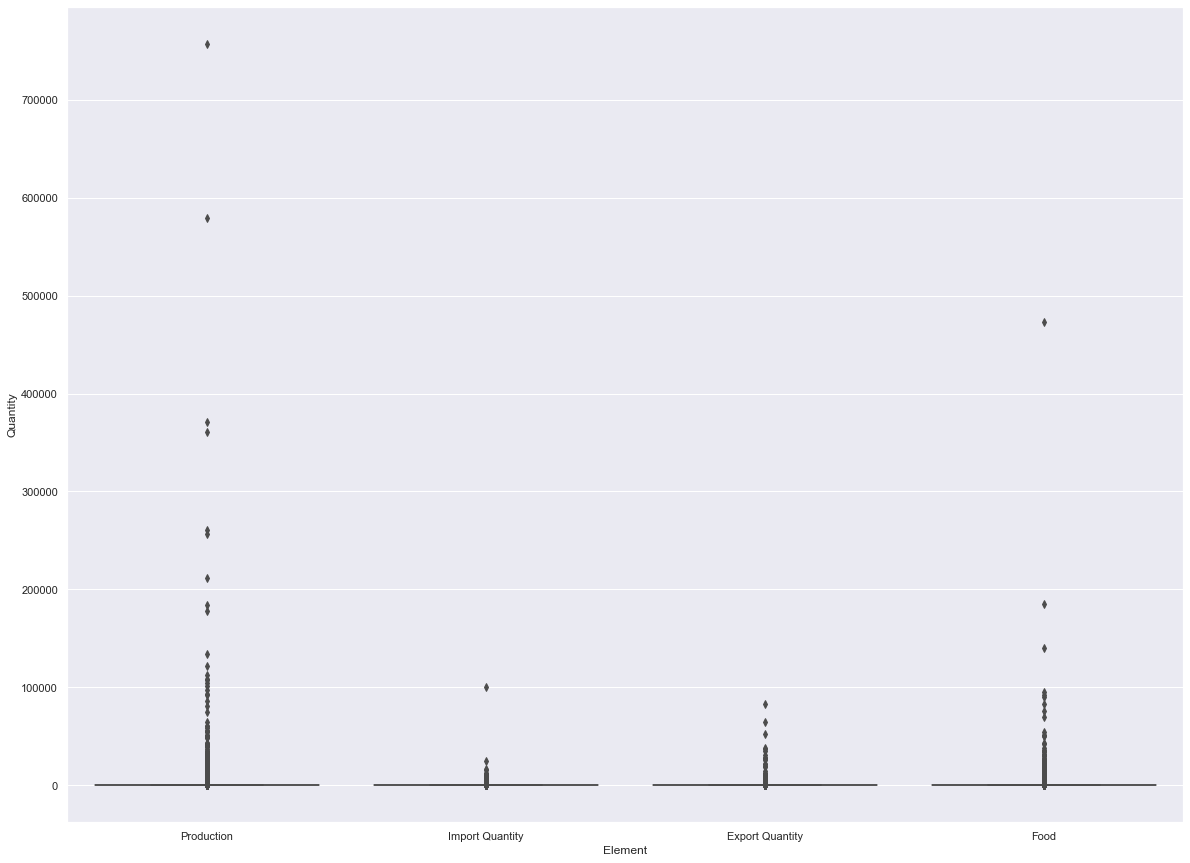

In [21]:
sns.set(rc={'figure.figsize':(20,15)})
sns.boxplot(data = dispo, x= 'Element', y='Quantity')

Nous pouvons constater que pour 'Production', 'Import Quantity' et 'Food' nous avons des Outliers.

Grâce aux tables ci-dessous, nous nous rendons compte que ces Outliers sont en grandes majorités représentées pour la Chine et l'Inde.

Pour le moment, nous allons les laisser ainsi.

In [22]:
dispo[(dispo['Quantity']>=100000)&(dispo['Element']=='Import Quantity')]

,Country,Element,Item,Quantity
45982,"China, mainland",Import Quantity,Soyabeans,100331.0


In [23]:
dispo[(dispo['Quantity']>100000)&(dispo['Element']=='Food')]

,Country,Element,Item,Quantity
45623,"China, mainland",Food,Rice and products,184641.0
46357,"China, mainland",Food,"Vegetables, other",473185.0
98939,India,Food,Rice and products,140617.0


In [24]:
dispo[(dispo['Quantity']>300000)&(dispo['Element']=='Production')]

,Country,Element,Item,Quantity
27913,Brazil,Production,Sugar cane,757117.0
46349,"China, mainland",Production,"Vegetables, other",579543.0
99123,India,Production,Sugar cane,370500.0
223461,United States of America,Production,Maize and products,360252.0


In [25]:
dispo.to_csv('dispo.csv')

Cette dernière commande nous permet d'exporter cette dataframe nettoyée en fichier csv afin de réaliser d'autres analyses sur le second notebook.

Il en sera de même avec les trois autres dataframes.

## Population

Cette dataframe nous donnera comme information la population d'un pays pour une année.

Cette dataframe ayant déjà été nettoyer pour un précédent projet, il reste très peu d'opérations de nettoyage à effectuer.

In [26]:
pop = pd.read_csv('Pop_mondiale.csv', delimiter =';')
pop

,Country,Granularity,Year,Population
0,Afghanistan,Total,2000,19542982
1,Afghanistan,Male,2000,9815442
2,Afghanistan,Female,2000,9727541
3,Afghanistan,Rural,2000,15657474
4,Afghanistan,Urban,2000,4436282
...,...,...,...,...
25425,Zimbabwe,Total,2021,15993524
25426,Zimbabwe,Male,2021,7543690
25427,Zimbabwe,Female,2021,8449834
25428,Zimbabwe,Rural,2021,12226340


Comme nous pouvons le voir, il existe plusieurs granularités.

Celle qui nous intéresse pour le moment est la population totale, nous allons supprimer les autres.

In [27]:
pop.drop(pop[(pop['Granularity'] !='Total')].index, inplace=True)

Nous pouvons maintenant supprimer la variable 'Granularity'.

In [28]:
pop = pop.loc[:,['Country','Year','Population']]
pop

,Country,Year,Population
0,Afghanistan,2000,19542982
5,Afghanistan,2001,19688632
10,Afghanistan,2002,21000256
15,Afghanistan,2003,22645130
20,Afghanistan,2004,23553551
...,...,...,...
25405,Zimbabwe,2017,14751101
25410,Zimbabwe,2018,15052184
25415,Zimbabwe,2019,15354608
25420,Zimbabwe,2020,15669666


In [29]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5086 entries, 0 to 25425
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     5086 non-null   object
 1   Year        5086 non-null   int64 
 2   Population  5086 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 158.9+ KB


In [30]:
pop.duplicated().sum()

0

Nous ne constatons aucune valeur nulle, nous n'avons pas besoin de changer le type des variables et nous ne constatons aucun doublon.

In [31]:
pop["Country"].unique().tolist()

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bonaire, Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China, Hong Kong SAR',
 'China, Macao SAR',
 'China',
 'China, Taiwan Province of',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czechia',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dom

Après une recherche sur le site d'où les données proviennent, il s'avère qu'ici 'China' fait réference à 'China, mainland'.

In [32]:
pop = pop.replace('China','China, mainland')

In [33]:
pop.to_csv('pop.csv')

## PIB

Nous allons maintenant passer au fichier contenant le PIB par habitant de chaque pays par année.

Ce PIB est fourni en dollar américain.

In [34]:
PIB = pd.read_csv('2b288c07-b169-4b17-b230-6b3f2616fa54_Data.csv')
PIB

,Series Name,Series Code,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,GDP per capita (current US$),NY.GDP.PCAP.CD,Afghanistan,AFG,..,..,183.532775237202,200.462566743838,221.657604182947,255.05511997846,...,663.141052810937,651.987861948108,628.146803888496,592.476537451681,520.252064031151,530.149830802984,502.056770622973,500.522664145294,516.866552182696,368.754614175459
1,GDP per capita (current US$),NY.GDP.PCAP.CD,Albania,ALB,1126.68334010717,1281.6598256178,1425.12421860142,1846.12012081207,2373.58129170055,2673.78658429559,...,4247.63004748194,4413.06200528903,4578.63320812155,3952.80253807527,4124.05538986272,4531.0193737689,5287.66369446913,5396.21586434732,5332.16047456847,6492.87201224634
2,GDP per capita (current US$),NY.GDP.PCAP.CD,Algeria,DZA,1780.37587355483,1754.58283816577,1794.811114232,2117.04754514758,2624.79523151946,3131.32853176212,...,5610.73089400516,5519.77757552373,5516.23060417242,4197.42136055142,3967.19945122178,4134.93671999429,4171.79501086373,4022.15018374716,3337.25251157504,3690.62787797599
3,GDP per capita (current US$),NY.GDP.PCAP.CD,American Samoa,ASM,..,..,8800.72881035461,9043.68236654528,8832.81851941832,8733.01428721137,...,11920.0610903131,12038.8715916596,12313.9973571825,13101.5418159165,13300.8246114811,12372.8847825647,13195.9358995539,13672.576657298,15501.5263374397,15743.3107582991
4,GDP per capita (current US$),NY.GDP.PCAP.CD,Andorra,AND,21620.4850212897,22809.291868131,24783.8364972969,31955.3880187598,37629.1289563453,39584.9157466551,...,44904.5800426279,44750.4356804443,45682.2462308595,38885.3760140905,39932.1644867147,40632.4843928243,42903.4435794631,41327.5020305489,37207.4938608348,42137.3272710372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nous allons commencer notre nettoyage par ne garder que les variables désirées puis,
par renommer les variables correspondant aux années.

In [35]:
PIB = PIB.loc[:,['Country Name','2000 [YR2000]','2001 [YR2001]','2002 [YR2002]','2003 [YR2003]','2004 [YR2004]','2005 [YR2005]',
                 '2006 [YR2006]','2007 [YR2007]','2008 [YR2008]','2009 [YR2009]','2010 [YR2010]','2011 [YR2011]',
                 '2012 [YR2012]','2013 [YR2013]','2014 [YR2014]','2015 [YR2015]','2016 [YR2016]','2017 [YR2017]',
                 '2018 [YR2018]','2019 [YR2019]','2020 [YR2020]','2021 [YR2021]']]
PIB

,Country Name,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,Afghanistan,..,..,183.532775237202,200.462566743838,221.657604182947,255.05511997846,274.000486471348,375.078128065393,387.849174300047,...,663.141052810937,651.987861948108,628.146803888496,592.476537451681,520.252064031151,530.149830802984,502.056770622973,500.522664145294,516.866552182696,368.754614175459
1,Albania,1126.68334010717,1281.6598256178,1425.12421860142,1846.12012081207,2373.58129170055,2673.78658429559,2972.74292399799,3595.03805682893,4370.5399247769,...,4247.63004748194,4413.06200528903,4578.63320812155,3952.80253807527,4124.05538986272,4531.0193737689,5287.66369446913,5396.21586434732,5332.16047456847,6492.87201224634
2,Algeria,1780.37587355483,1754.58283816577,1794.811114232,2117.04754514758,2624.79523151946,3131.32853176212,3500.13541289238,3971.80348828223,4946.56401720759,...,5610.73089400516,5519.77757552373,5516.23060417242,4197.42136055142,3967.19945122178,4134.93671999429,4171.79501086373,4022.15018374716,3337.25251157504,3690.62787797599
3,American Samoa,..,..,8800.72881035461,9043.68236654528,8832.81851941832,8733.01428721137,8673.92719531291,9187.16634446553,10019.502245442,...,11920.0610903131,12038.8715916596,12313.9973571825,13101.5418159165,13300.8246114811,12372.8847825647,13195.9358995539,13672.576657298,15501.5263374397,15743.3107582991
4,Andorra,21620.4850212897,22809.291868131,24783.8364972969,31955.3880187598,37629.1289563453,39584.9157466551,43086.499827003,50565.4564814851,53719.421266769,...,44904.5800426279,44750.4356804443,45682.2462308595,38885.3760140905,39932.1644867147,40632.4843928243,42903.4435794631,41327.5020305489,37207.4938608348,42137.3272710372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
PIB = PIB.rename(columns={'2000 [YR2000]':'2000','2001 [YR2001]':'2001','2002 [YR2002]':'2002','2003 [YR2003]':'2003',
                           '2004 [YR2004]':'2004','2005 [YR2005]':'2005','2006 [YR2006]':'2006','2007 [YR2007]':'2007',
                           '2008 [YR2008]':'2008','2009 [YR2009]':'2009','2010 [YR2010]':'2010','2011 [YR2011]':'2011',
                           '2012 [YR2012]':'2012','2013 [YR2013]':'2013','2014 [YR2014]':'2014','2015 [YR2015]':'2015',
                           '2016 [YR2016]':'2016','2017 [YR2017]':'2017','2018 [YR2018]':'2018','2019 [YR2019]':'2019',
                           '2020 [YR2020]':'2020','2021 [YR2021]':'2021'})

In [37]:
PIB['Country Name'].unique().tolist()

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'Fren

Nous nous apercevons qu'une des provinces de la Chine, à savoir Taiwan, ne figure pas dans la dataframe.

Nous avons donc dû récupérer les données pour les rajouter ensuite à la dataframe.

In [38]:
Taiwan_pib = pd.read_csv('Taiwan_pib.csv', delimiter = ';')
Taiwan_pib

,"GDP per capita, current prices\n (U.S. dollars per capita)",2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"China, Taiwan Province of",14844.238,13357.195,13651.355,14040.597,15290.307,16427.459,16892.883,17723.704,18053.591,...,21256.361,21945.46,22844.316,22752.991,23070.733,25061.624,25825.566,25903.168,28404.717,33143.011


Pour que la concaténation des deux dataframes se fasse sans souci, il faut que le nombre ainsi que le nom des variables correspondent.

In [39]:
Taiwan_pib = Taiwan_pib.rename(columns={'GDP per capita, current prices\n (U.S. dollars per capita)':'Country Name'})
Taiwan_pib

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"China, Taiwan Province of",14844.238,13357.195,13651.355,14040.597,15290.307,16427.459,16892.883,17723.704,18053.591,...,21256.361,21945.46,22844.316,22752.991,23070.733,25061.624,25825.566,25903.168,28404.717,33143.011


Nous pouvons maintenant passer à la concaténation.

In [40]:
PIB = pd.concat([PIB,Taiwan_pib])

Pour plus de simplicité, nous allons regrouper toutes les variables représentant une année précise en une seule et même variable.

In [41]:
PIB = pd.melt(PIB, id_vars=['Country Name'], value_vars=['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012',
                 '2013','2014','2015','2016','2017','2018','2019','2020','2021'])
PIB

,Country Name,variable,value
0,Afghanistan,2000,..
1,Albania,2000,1126.68334010717
2,Algeria,2000,1780.37587355483
3,American Samoa,2000,..
4,Andorra,2000,21620.4850212897
...,...,...,...
4901,NaN,2021,NaN
4902,NaN,2021,NaN
4903,NaN,2021,NaN
4904,NaN,2021,NaN


Nous renommons les variables pour qu'elles correspondent à ce qu'elles représentent.

In [42]:
PIB =PIB.rename(columns = {'Country Name':'Country','variable':'Year','value':'PIB'})
PIB

,Country,Year,PIB
0,Afghanistan,2000,..
1,Albania,2000,1126.68334010717
2,Algeria,2000,1780.37587355483
3,American Samoa,2000,..
4,Andorra,2000,21620.4850212897
...,...,...,...
4901,NaN,2021,NaN
4902,NaN,2021,NaN
4903,NaN,2021,NaN
4904,NaN,2021,NaN


In [43]:
PIB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4906 entries, 0 to 4905
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  4796 non-null   object
 1   Year     4906 non-null   object
 2   PIB      4796 non-null   object
dtypes: object(3)
memory usage: 115.1+ KB


Comme nous pouvons le constater, il y a plusieurs problèmes dans cette dataframe :
 - nous avons des valeurs nulles
 - la variable 'PIB' contient des valeurs qui ne sont pas des nombres, à savoir '..'
 - le type des variables n'est pas le bon
 
Nous allons donc corriger tout cela

In [44]:
PIB['Year'] = PIB['Year'].astype(int)

In [45]:
PIB.drop(PIB.loc[PIB['PIB']=='..'].index,inplace=True)

In [46]:
PIB['PIB'] = PIB['PIB'].astype(float)

In [47]:
PIB.dtypes

Country     object
Year         int32
PIB        float64
dtype: object

Vu le faible nombre de valeurs nulles, nous allons les supprimer plutôt que de les remplacer par une valeur arbitraire.

In [48]:
PIB.drop(PIB.loc[PIB['PIB'].isnull()].index,inplace=True)

In [49]:
PIB.drop(PIB.loc[PIB['Country'].isnull()].index,inplace=True)

Après avoir corrigé ces différents problèmes, nous allons maintenant vérifier s'il n'y a pas de doublons dans cette dataframe.

In [50]:
PIB.duplicated().sum()

0

In [51]:
PIB.Country.unique().tolist()

['Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Polynesia',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Green

Nous remarquons qu'il y a beaucoup de noms de pays qui n'ont pas la même orthographe que les deux dataframes précédentes.

Nous allons corriger cela pour palier à tout éventuel problème de disparition de données lors des jointures.

In [52]:
PIB = PIB.replace('Bahamas, The','Bahamas')
PIB = PIB.replace('Bolivia','Bolivia (Plurinational State of)')
PIB = PIB.replace('Hong Kong SAR, China','China, Hong Kong SAR')
PIB = PIB.replace('Macao SAR, China','China, Macao SAR')
PIB = PIB.replace('China','China, mainland')
PIB = PIB.replace('Congo, Rep.','Congo')
PIB = PIB.replace('Congo, Dem. Rep.','Democratic Republic of the Congo')
PIB = PIB.replace('Egypt, Arab Rep.','Egypt')
PIB = PIB.replace('Gambia, The','Gambia')
PIB = PIB.replace('Iran, Islamic Rep.','Iran (Islamic Republic of)')
PIB = PIB.replace('Kyrgyz Republic','Kyrgyzstan')
PIB = PIB.replace('Lao PDR','Lao People\'s Democratic Republic')
PIB = PIB.replace('Micronesia, Fed. Sts.','Micronesia (Federated States of)')
PIB = PIB.replace('Korea, Rep.','Republic of Korea')
PIB = PIB.replace('Moldova','Republic of Moldova')
PIB = PIB.replace('St. Kitts and Nevis','Saint Kitts and Nevis')
PIB = PIB.replace('St. Lucia','Saint Lucia')
PIB = PIB.replace('St. Vincent and the Grenadines','Saint Vincent and the Grenadines')
PIB = PIB.replace('Slovak Republic','Slovakia')
PIB = PIB.replace('Turkiye','Türkiye')
PIB = PIB.replace('United Kingdom','United Kingdom of Great Britain and Northern Ireland')
PIB = PIB.replace('Tanzania','United Republic of Tanzania')
PIB = PIB.replace('United States','United States of America')
PIB = PIB.replace('Venezuela, RB','Venezuela (Bolivarian Republic of')
PIB = PIB.replace('Yemen, Rep.','Yemen')

In [53]:
PIB.to_csv('PIB.csv')

## Stabilité politique 

Tout comme pour la dataframe 'Population', cette dataframe a été précédement utilisée pour un projet récent.

Donc le nettoyage sera minimal.

In [54]:
pol = pd.read_csv('Index_stabilité_politique.csv', delimiter =';')
pol

,Country,Year,Political stability and absence of violence/terrorism
0,Afghanistan,2000,-2.44
1,Afghanistan,2002,-2.04
2,Afghanistan,2003,-2.20
3,Afghanistan,2004,-2.30
4,Afghanistan,2005,-2.07
...,...,...,...
3903,Zimbabwe,2016,-0.62
3904,Zimbabwe,2017,-0.71
3905,Zimbabwe,2018,-0.72
3906,Zimbabwe,2019,-0.96


In [55]:
pol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3908 entries, 0 to 3907
Data columns (total 3 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Country                                                3908 non-null   object 
 1   Year                                                   3908 non-null   int64  
 2   Political stability and absence of violence/terrorism  3908 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.7+ KB


Comme nous pouvons le constater, nous n'avons pas de valeurs nulles et nous n'avons besoin de changer le type des variables.

Nous allons toutefois raccourcir le nom de la variable représentant la stabilité politique en la renommant 'Index'.

In [56]:
pol = pol.rename(columns = {'Political stability and absence of violence/terrorism':'Index'})
pol

,Country,Year,Index
0,Afghanistan,2000,-2.44
1,Afghanistan,2002,-2.04
2,Afghanistan,2003,-2.20
3,Afghanistan,2004,-2.30
4,Afghanistan,2005,-2.07
...,...,...,...
3903,Zimbabwe,2016,-0.62
3904,Zimbabwe,2017,-0.71
3905,Zimbabwe,2018,-0.72
3906,Zimbabwe,2019,-0.96


In [57]:
pol.Country.unique().tolist()

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China, Hong Kong SAR',
 'China, Macao SAR',
 'China, Taiwan Province of',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',


En regardant la liste des pays présents dans cette dataframe, nous ne pouvons nous empêcher de constater qu'il manque la Chine.

Nous allons donc rajouter ces données manquantes.

In [58]:
china_pol = pd.read_csv('China_index_stab_pol.csv',delimiter= ';')
china_pol

,Country,Year,Index
0,"China, mainland",2000,-0.21
1,"China, mainland",2002,-0.33
2,"China, mainland",2003,-0.57
3,"China, mainland",2004,-0.39
4,"China, mainland",2005,-0.50
5,"China, mainland",2006,-0.54
6,"China, mainland",2007,-0.50
7,"China, mainland",2008,-0.49
8,"China, mainland",2009,-0.45
9,"China, mainland",2010,-0.66


In [59]:
pol = pd.concat([pol,china_pol])
pol = pol.reset_index(drop=True)
pol

,Country,Year,Index
0,Afghanistan,2000,-2.44
1,Afghanistan,2002,-2.04
2,Afghanistan,2003,-2.20
3,Afghanistan,2004,-2.30
4,Afghanistan,2005,-2.07
...,...,...,...
3924,"China, mainland",2017,-0.23
3925,"China, mainland",2018,-0.30
3926,"China, mainland",2019,-0.26
3927,"China, mainland",2020,-0.33


Nous verifions qu'il n'y a aucun doublon dans cette dataframe.

In [60]:
pol.duplicated().sum()

0

In [61]:
pol.to_csv('pol.csv')

Cela conclut le nettoyage de nos données.

Nous pouvons maintenant passer à nos analyses.

# Analyse des données

## Import des différentes librairies utilisées

Nous commençons par charger une nouvelle librairie utile pour les graphiques simples.

In [62]:
import matplotlib.pyplot as plt

## Données de la France : Modèle

Nous allons effectuer quelques analyses univariées afin de pouvoir les comparer plus tard en les utilisant comme base pour nos analyses du pays que nous choisirons pour nous implanter.

### Evolution de la population française

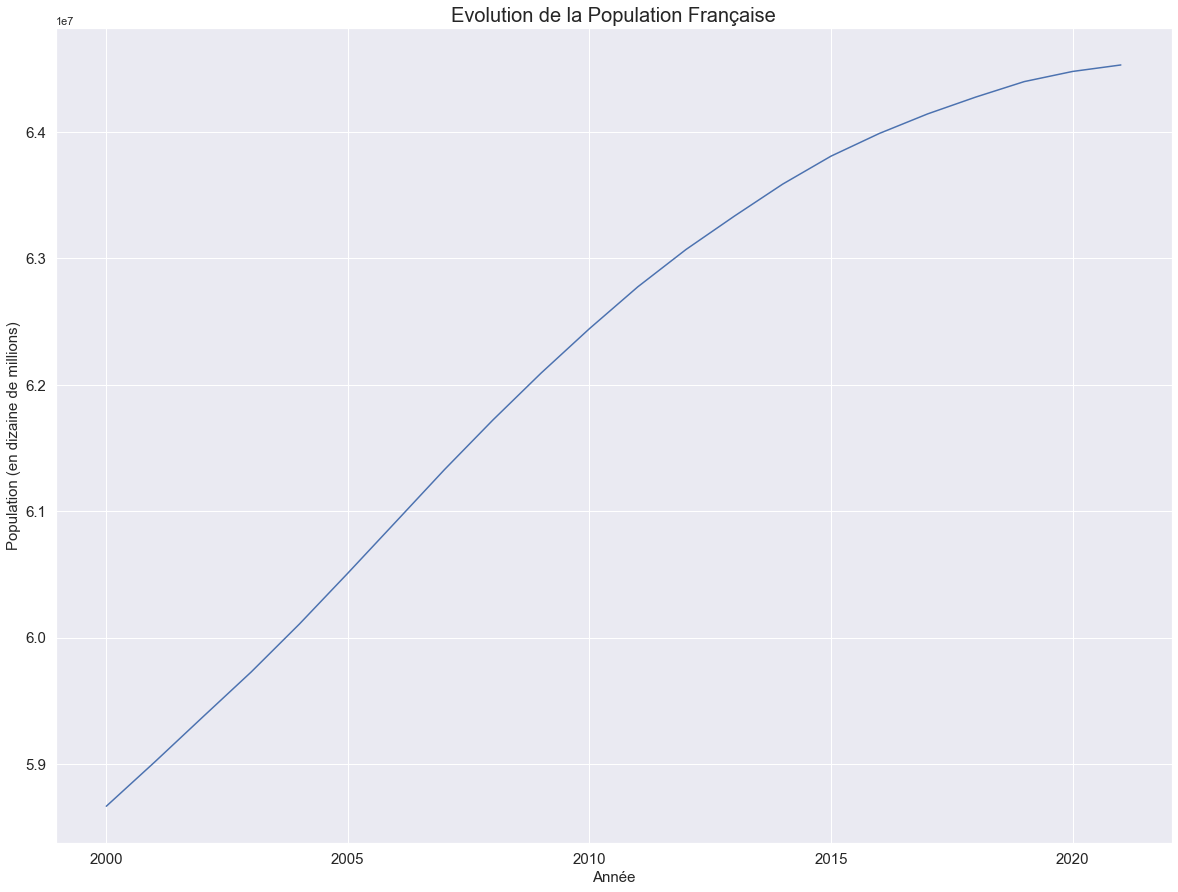

In [63]:
sns.lineplot(data = pop[pop['Country']=='France'], x = 'Year', y = 'Population', estimator = sum)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Evolution de la Population Française", fontsize = 20)
plt.xlabel("Année",fontsize = 15)
plt.ylabel("Population (en dizaine de millions)", fontsize = 15)
plt.savefig('evolution_pop_france.png')
plt.show()

Ce graphique nous montre l'évolution de la population française ente 2000 et 2021.

Ce que l'on peut dire en regardant ce graphique est que la population française a beaucoup augmentée :
 - On passe de moins de 59 millions en 2000 à plus de 64 millions à partir de 2016
 - Cette augmentation semble diminuer durant ces 6 dernières années

### Evolution de la stabilité politique du pays

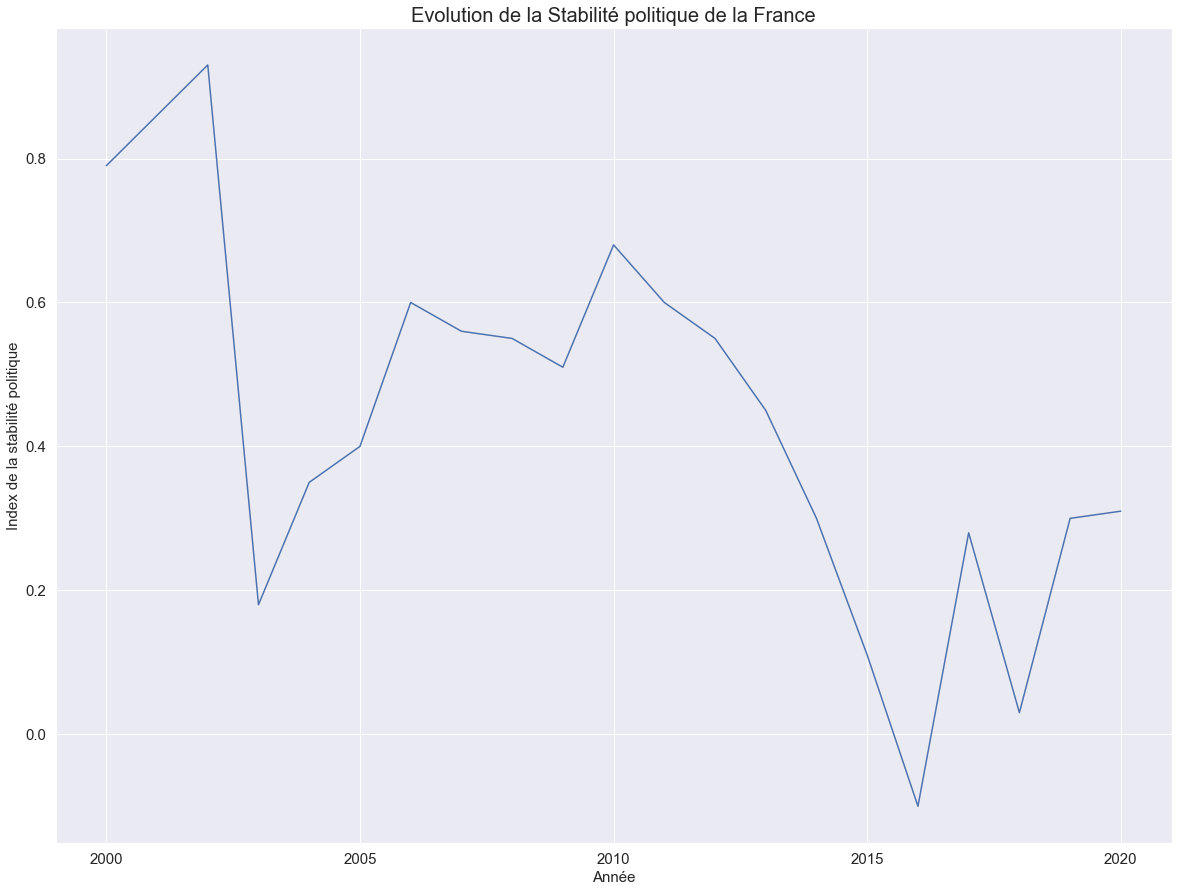

In [64]:
sns.lineplot(data = pol[pol['Country']=='France'], x = 'Year', y = 'Index')
plt.xticks([2000,2005,2010,2015,2020],fontsize=15)
plt.yticks(fontsize=15)
plt.title("Evolution de la Stabilité politique de la France", fontsize = 20)
plt.xlabel("Année",fontsize = 15)
plt.ylabel("Index de la stabilité politique", fontsize = 15)
plt.savefig('evolution_pol_france.png')
plt.show()

Ce graphique nous montre l'évolution de la stabilité politique de la France entre 2000 et 2020.

Nous pouvons constater plusieurs choses sur ce graphique :

 - Au début des années 2000, l'index de la stabilité politique est à son plus haut avant de brusquement chuter en-dessous de 0.2 en 2003. 
 
 
 - Cet index remonte jusqu'à 0.7 en 2010 avant de subir une nouvelle chute qui se poursuivra jusqu'en 2016 où il atteindra -0.1 , sûrement dû aux attentats de Paris en 2015.
 
 
 - Cet index se stabilise autour de 0.3 en 2020

### Evolution du PIB par habitant

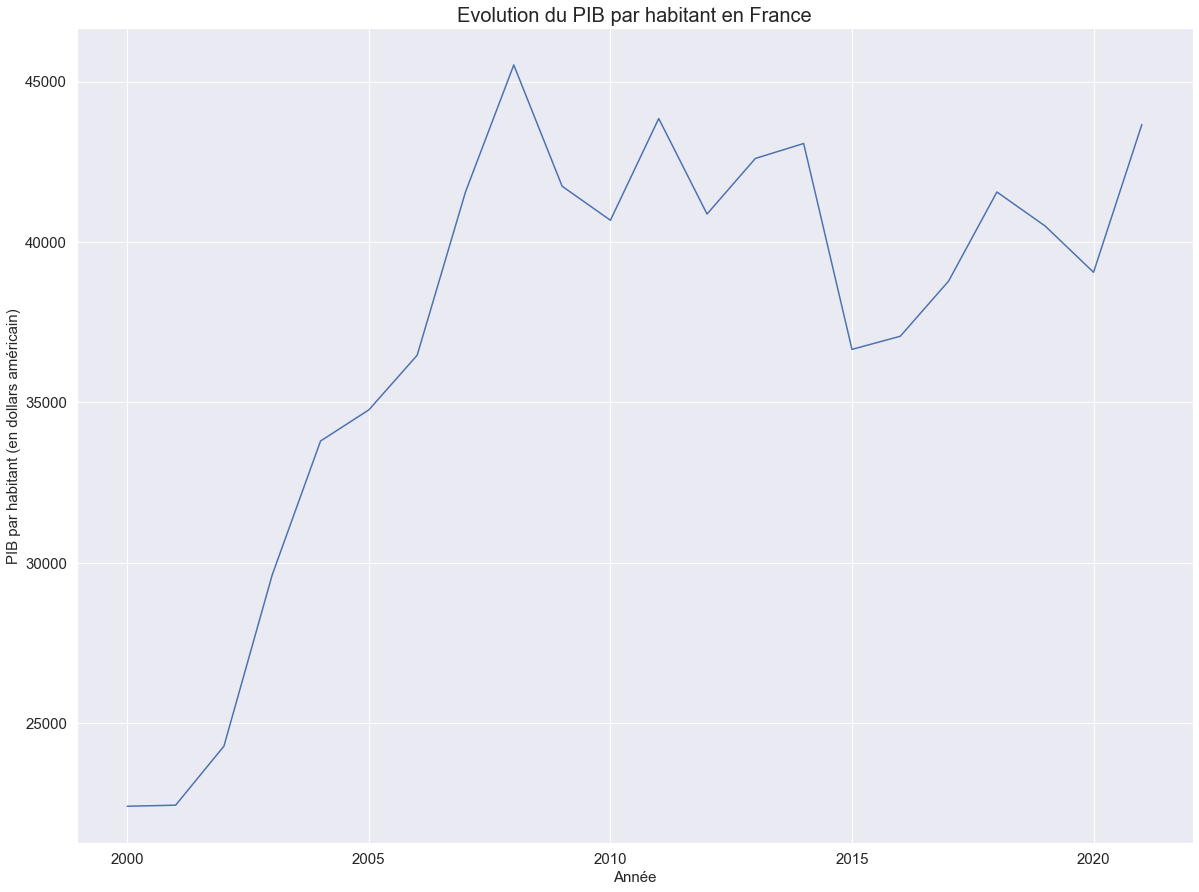

In [65]:
sns.lineplot(data = PIB[PIB['Country']=='France'], x = 'Year', y = 'PIB')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Evolution du PIB par habitant en France", fontsize = 20)
plt.xlabel("Année",fontsize = 15)
plt.ylabel("PIB par habitant (en dollars américains)", fontsize = 15)
plt.savefig('evolution_pib_france.png')
plt.show()

Pour le graphique de l'évolution du PIB par habitant en France, nous pouvons constater plusieurs points :
 - le PIB est en constante évolution jusqu'en 2008 où il dépasse les 45 000 dollars
 
 
 - après cette évolution, il varie entre 41k et 44k dollars avant de brusquement baisser à environ 37k dollars en 2015
 
 
 - le PIB semble repartir en hausse alors qu'il se situe à environ 44k dollars en 2021
 

### Répartition de la production des différents produits alimentaires en France

Nous allons d'abord commencer en sélectionnant les données concernant la France et la production en les réunissant dans une nouvelle dataframe.

In [66]:
dispo_prod = dispo[(dispo['Element']=='Production')&(dispo['Country']=='France')]

Nous allons ensuite réaliser les sommes des productions pour chaque liste de produits que nous avons précédement créé pour pouvoir réaliser le diagramme en camembert où chaque part représentera une somme.

In [67]:
dispo_cereales = dispo_prod.Quantity[dispo_prod.Item.isin(cereales)].sum()
dispo_edulcorants = dispo_prod.Quantity[dispo_prod.Item.isin(edulcorants)].sum()
dispo_veg = dispo_prod.Quantity[dispo_prod.Item.isin(prod_veg)].sum()
dispo_animaliers = dispo_prod.Quantity[dispo_prod.Item.isin(prod_animaliers)].sum()
dispo_autres = dispo_prod.Quantity[dispo_prod.Item.isin(autres)].sum()

Nous allons maintenant réaliser le graphique souhaité.

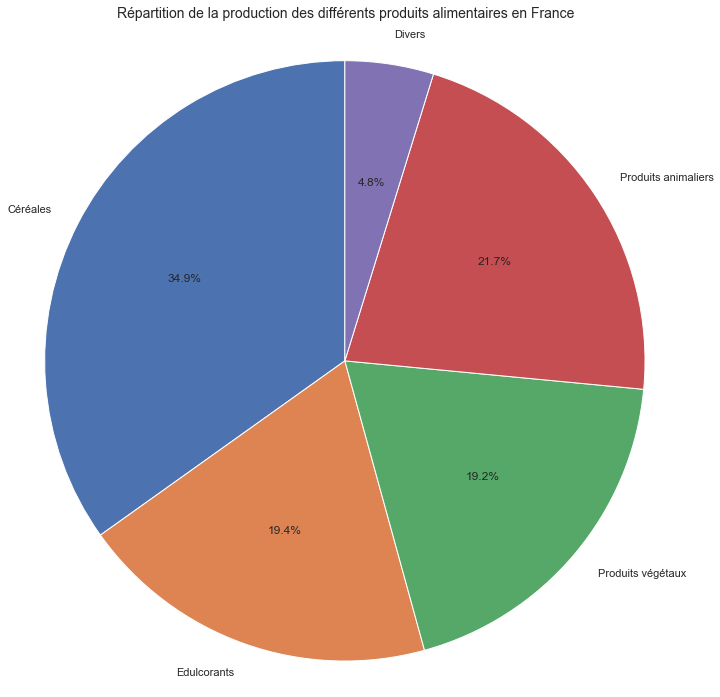

In [68]:
labels = 'Céréales', 'Edulcorants','Produits végétaux','Produits animaliers', 'Divers'
# Etiquettes des différentes parts de notre graphique

sizes = [dispo_cereales, dispo_edulcorants, dispo_veg, dispo_animaliers, dispo_autres]
# Tailles de chaque part de notre graphique

plt.figure(figsize = (12,12))
# Taille du graphique

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
# Création du graphique avec les spécificités prédéfinies

plt.title('Répartition de la production des différents produits alimentaires en France', fontsize = 14, pad=20)
# Titre du graphique

plt.axis('equal')
# Permet de faire en sort que la forme finale soit bien un cercle

plt.savefig('repartition_prod_france.png')

plt.show()

Ce que nous pouvons conclure en regardant ce graphique est :
 - la plupart de la production concerne les céréales
 - les produits issus des animaux, ceux issus des végétaux et les edulcorants sont 2ème avec des parts assez similaires

### Répartition des exports des différents produits alimentaires en France

Nous allons refaire exactement les mêmes étapes que précédement pour les exports.

In [69]:
dispo_exp = dispo[(dispo['Element']=='Export Quantity')&(dispo['Country']=='France')]

In [70]:
dispo_cereales = dispo_exp.Quantity[dispo_exp.Item.isin(cereales)].sum()
dispo_edulcorants = dispo_exp.Quantity[dispo_exp.Item.isin(edulcorants)].sum()
dispo_veg = dispo_exp.Quantity[dispo_exp.Item.isin(prod_veg)].sum()
dispo_animaliers = dispo_exp.Quantity[dispo_exp.Item.isin(prod_animaliers)].sum()
dispo_autres = dispo_exp.Quantity[dispo_exp.Item.isin(autres)].sum()

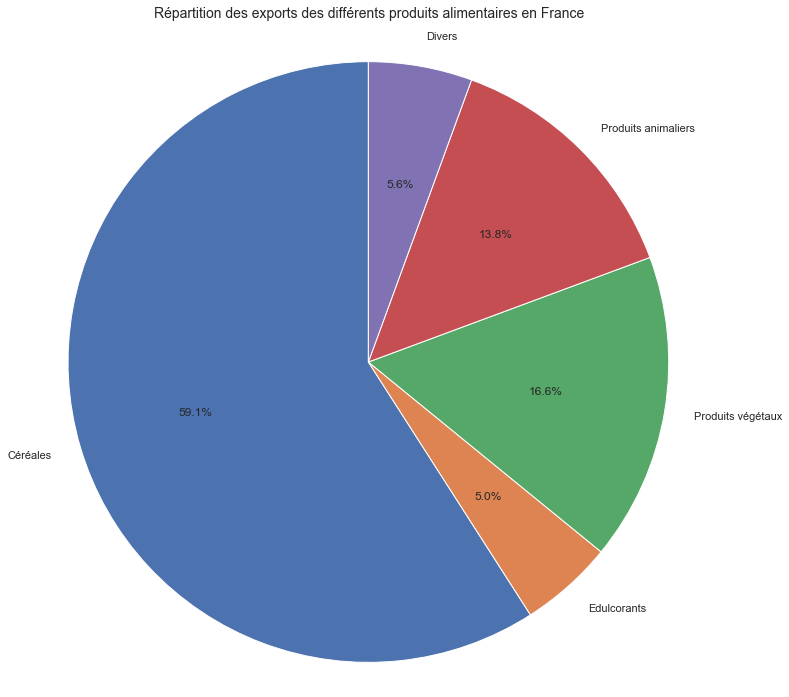

In [71]:
labels = 'Céréales', 'Edulcorants','Produits végétaux','Produits animaliers', 'Divers'
# Etiquettes des différentes parts de notre graphique

sizes = [dispo_cereales, dispo_edulcorants, dispo_veg,dispo_animaliers, dispo_autres]
# Tailles de chaque part de notre graphique

plt.figure(figsize = (12,12))
# Taille du graphique

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
# Création du graphique avec les spécificités prédéfinies

plt.title('Répartition des exports des différents produits alimentaires en France', fontsize = 14, pad=20)
# Titre du graphique

plt.axis('equal')
# Permet de faire en sort que la forme finale soit bien un cercle

plt.savefig('repartition_exp_france.png')

plt.show()

Grâce à ce graphique, nous pouvons nous apercevoir que près de 60% des exports concerne les produits céréaliers.

### Répartition des imports des différents produits alimentaires en France

In [72]:
dispo_imp = dispo[(dispo['Element']=='Import Quantity')&(dispo['Country']=='France')]

In [73]:
dispo_cereales = dispo_imp.Quantity[dispo_imp.Item.isin(cereales)].sum()
dispo_edulcorants = dispo_imp.Quantity[dispo_imp.Item.isin(edulcorants)].sum()
dispo_veg = dispo_imp.Quantity[dispo_imp.Item.isin(prod_veg)].sum()
dispo_animaliers = dispo_imp.Quantity[dispo_imp.Item.isin(prod_animaliers)].sum()
dispo_autres = dispo_imp.Quantity[dispo_imp.Item.isin(autres)].sum()

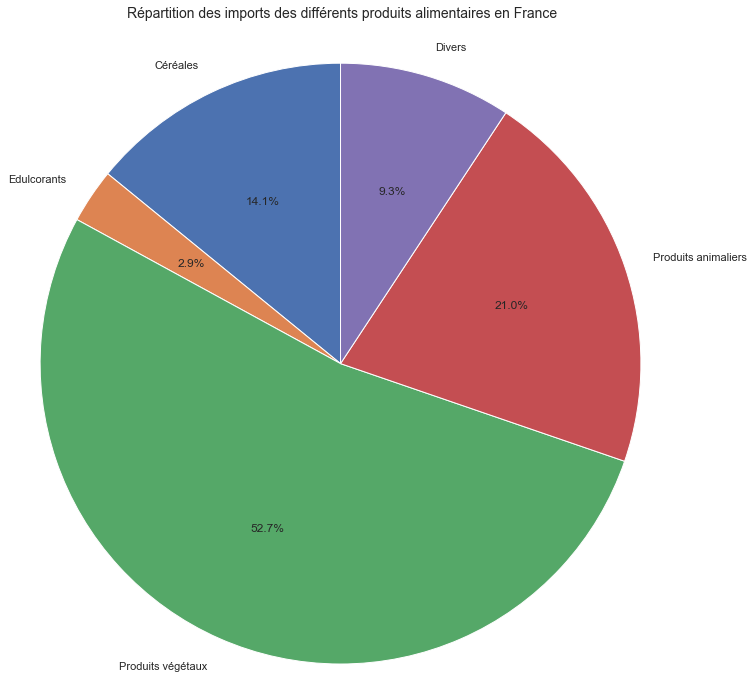

In [74]:
labels = 'Céréales', 'Edulcorants','Produits végétaux','Produits animaliers','Divers'
# Etiquettes des différentes parts de notre graphique

sizes = [dispo_cereales, dispo_edulcorants, dispo_veg, dispo_animaliers, dispo_autres]
# Tailles de chaque part de notre graphique

plt.figure(figsize = (12,12))
# Taille du graphique

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
# Création du graphique avec les spécificités prédéfinies

plt.title('Répartition des imports des différents produits alimentaires en France', fontsize = 14, pad=20)
# Titre du graphique

plt.axis('equal')
# Permet de faire en sort que la forme finale soit bien un cercle

plt.savefig('repartition_imp_france.png')

plt.show()

Ce graphique nous montre que la France importe principalement des produits d'origine végétale, plus de la moitié des imports sont concernés.

### Répartition des différents produits alimentaire dans l'alimentation en France

In [75]:
dispo_food = dispo[(dispo['Element']=='Food')&(dispo['Country']=='France')]

In [76]:
dispo_cereales = dispo_food.Quantity[dispo_food.Item.isin(cereales)].sum()
dispo_edulcorants = dispo_food.Quantity[dispo_food.Item.isin(edulcorants)].sum()
dispo_veg = dispo_food.Quantity[dispo_food.Item.isin(prod_veg)].sum()
dispo_animaliers = dispo_food.Quantity[dispo_food.Item.isin(prod_animaliers)].sum()
dispo_autres = dispo_food.Quantity[dispo_food.Item.isin(autres)].sum()

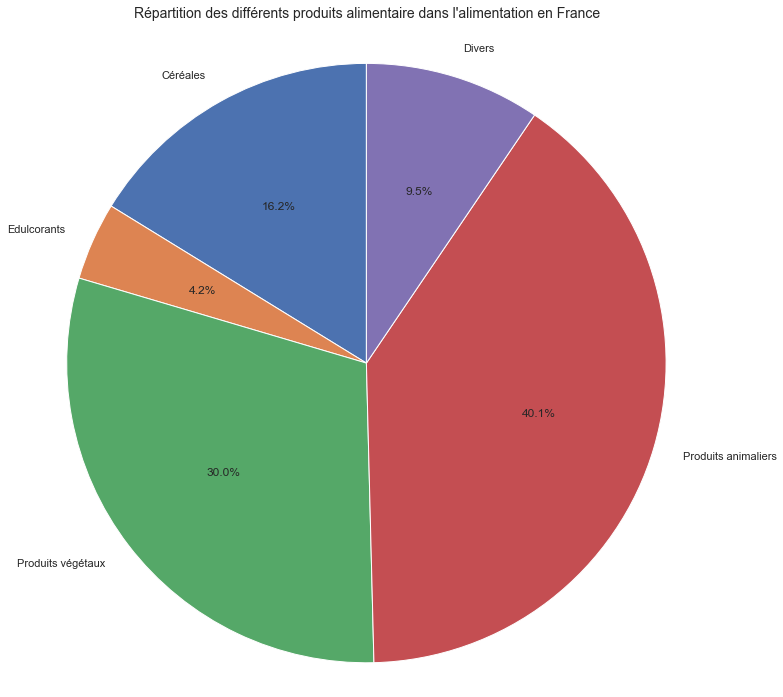

In [77]:
labels = 'Céréales', 'Edulcorants','Produits végétaux','Produits animaliers','Divers'
# Etiquettes des différentes parts de notre graphique

sizes = [dispo_cereales, dispo_edulcorants, dispo_veg, dispo_animaliers, dispo_autres]
# Tailles de chaque part de notre graphique

plt.figure(figsize = (12,12))
# Taille du graphique

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
# Création du graphique avec les spécificités prédéfinies

plt.title('Répartition des différents produits alimentaire dans l\'alimentation en France', fontsize = 14, pad=20)
# Titre du graphique

plt.axis('equal')
# Permet de faire en sort que la forme finale soit bien un cercle

plt.savefig('repartition_food_france.png')

plt.show()

Grâce à ce dernier diagramme en camembert, nous pouvons constater que les produits d'origine animale représente une grande part de l'alimentation française, suivi des produits d'origine végétale.

## Classements des pays

### Classements des pays ayant le meilleur index de stabilité politique en 2020

Pour réaliser ce classement, nous allons commencer par sélectionner l'année souhaitée, qui est la dernière disponible dans ce fichier, puis nous allons trier les valeurs par ordre décroissant pour finalement afficher les 10 pays ayant le meilleur index de stabilité politique.

In [78]:
top_pol = pol[pol['Year']==2020]
top_pol = top_pol.sort_values(by = 'Index', ascending = False)
top_pol.iloc[0:10]

,Country,Year,Index
1453,Greenland,2020,1.91
96,Andorra,2020,1.62
2500,New Zealand,2020,1.49
3181,Singapore,2020,1.47
1633,Iceland,2020,1.39
1081,Dominica,2020,1.35
2565,Niue,2020,1.35
2605,Norway,2020,1.25
2091,Luxembourg,2020,1.23
3411,Switzerland,2020,1.19


Nous pouvons constater que la moitié des pays listés ci-dessus sont des pays d'Europe.

### Classement des pays ayant le meilleur PIB par habitant en 2020

In [79]:
top_pib = PIB[PIB['Year']==2020]
top_pib = top_pib.sort_values(by = 'PIB', ascending = False)
top_pib.iloc[0:10]

,Country,Year,PIB
4590,Monaco,2020,182538.638340
4574,Liechtenstein,2020,157754.954374
4576,Luxembourg,2020,117370.496900
4481,Bermuda,2020,107791.886435
4648,Switzerland,2020,85656.322666
4553,Ireland,2020,85420.190856
4496,Cayman Islands,2020,83329.458774
4607,Norway,2020,67329.677791
4666,United States of America,2020,63530.633484
4525,Faroe Islands,2020,61980.290024


Dans ce top, nous ne retrouvons les pays que de deux continents :
 - le continent européen avec 7 pays
 - le continent américain avec 3 pays
 

Nous pouvons également constater que ous retrouvons 3 pays du précédent classement, tous situé sur le continent européen :
 - la Norvège
 - le Luxembourg
 - la Suisse
 

### Classement des pays avec la plus grande population en 2020

In [80]:
top_pop = pop[pop['Year']==2020]
top_pop = top_pop.sort_values(by = 'Population', ascending = False)
top_pop.iloc[0:10]

,Country,Year,Population
4929,"China, mainland",2020,1424929781
10814,India,2020,1396387127
24210,United States of America,2020,335942003
10924,Indonesia,2020,271857970
17329,Pakistan,2020,227196741
3125,Brazil,2020,213196304
16669,Nigeria,2020,208327405
1860,Bangladesh,2020,167420951
19089,Russian Federation,2020,145617329
14774,Mexico,2020,125998302


Nous pouvons constater que la plupart des pays de ce classement sont situés en Asie.

Nous pouvons également constater que :
 - ce classement a en commun avec le précédent les États-Unis
 - en revanche, il n'a aucun pays en commun avec le classement des 10 pays avec le meilleur index de stabilité politique 

# Analyse exploratoire des données

## Introduction

Avant toute chose, nous allons faire un premier groupement sans aucune spécificité ni exclusions de données pour observer ce que nous pouvons obtenir.

## Importation de librairies 

Pour cette partie, nous allons d'abord charger de nouvelles librairies qui nous seront utiles.

In [81]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Jointure

Nous allons maintenant procéder à la jointure des différentes dataframes.

Ces jointures seront des jointures internes, autrement dit, ne seront conservés que les données dont les pays et l'année sont renseignés dans les trois premières dataframes (pol, PIB et pop).

In [82]:
data = pd.merge(pol,PIB)
data

,Country,Year,Index,PIB
0,Afghanistan,2002,-2.04,183.532775
1,Afghanistan,2003,-2.20,200.462567
2,Afghanistan,2004,-2.30,221.657604
3,Afghanistan,2005,-2.07,255.055120
4,Afghanistan,2006,-2.22,274.000486
...,...,...,...,...
3776,"China, mainland",2017,-0.23,8816.986905
3777,"China, mainland",2018,-0.30,9905.342004
3778,"China, mainland",2019,-0.26,10143.838196
3779,"China, mainland",2020,-0.33,10408.669756


In [83]:
data = pd.merge(data, pop)
data

,Country,Year,Index,PIB,Population
0,Afghanistan,2002,-2.04,183.532775,21000256
1,Afghanistan,2003,-2.20,200.462567,22645130
2,Afghanistan,2004,-2.30,221.657604,23553551
3,Afghanistan,2005,-2.07,255.055120,24411191
4,Afghanistan,2006,-2.22,274.000486,25442944
...,...,...,...,...,...
3759,"China, mainland",2017,-0.23,8816.986905,1410275957
3760,"China, mainland",2018,-0.30,9905.342004,1417069468
3761,"China, mainland",2019,-0.26,10143.838196,1421864031
3762,"China, mainland",2020,-0.33,10408.669756,1424929781


Pour joindre la 4ème dataframe, nous allons d'abord regrouper les valeurs pour chaque 'Element' de chaque pays afin de rendre plus simple les ACP et autres analyses exploratoires.

In [84]:
dispo_ = dispo.copy()

In [85]:
dispo_ = dispo_.groupby(by = ['Country','Element']).sum()
dispo_ = dispo_.reset_index()
dispo_

,Country,Element,Quantity
0,Afghanistan,Export Quantity,884.00
1,Afghanistan,Food,15413.20
2,Afghanistan,Import Quantity,5390.10
3,Afghanistan,Production,15029.10
4,Albania,Export Quantity,188.02
...,...,...,...
735,Zambia,Production,16261.94
736,Zimbabwe,Export Quantity,307.54
737,Zimbabwe,Food,4636.07
738,Zimbabwe,Import Quantity,1790.15


Nous allons ensuite créer un tableau croisé dynamique afin de faire ressortir les valeurs de la variable 'Element' comme de nouvelles variables en y mettant comme nouvelles valeurs celle de la variable 'Quantity'.

In [86]:
dispo_ = dispo_.pivot(index = 'Country',columns='Element', values='Quantity')
dispo_ = dispo_.reset_index()

Nous allons dès à présent réaliser la dernière jointure en ne sélectionnant que l'année 2020 pour la dataframe résultant de la jointure des 3 premières dataframes puisque la dataframe dispo concerne uniquement les données de cette année-là.

In [87]:
acp = pd.merge(data[data['Year']==2020],dispo_)
acp

,Country,Year,Index,PIB,Population,Export Quantity,Food,Import Quantity,Production
0,Afghanistan,2020,-2.73,516.866552,38972230,884.00,15413.20,5390.10,15029.10
1,Albania,2020,0.08,5332.160475,2866849,188.02,3452.90,849.40,4251.70
2,Algeria,2020,-0.86,3337.252512,43451666,867.59,34199.59,19064.88,30624.88
3,Angola,2020,-0.52,1603.993477,33428485,128.10,19862.68,3188.21,24395.70
4,Antigua and Barbuda,2020,0.93,14787.635775,92664,0.09,56.29,51.32,18.18
...,...,...,...,...,...,...,...,...,...
170,Uzbekistan,2020,-0.44,1749.655815,33526656,3135.24,33323.93,5459.93,39981.72
171,Vanuatu,2020,0.90,2877.520173,311685,90.48,191.89,51.10,506.79
172,Zambia,2020,-0.13,956.831364,18927715,611.10,8762.15,521.83,16261.94
173,Zimbabwe,2020,-1.08,1372.696674,15669666,307.54,4636.07,1790.15,8616.23


## Séparation des données

Pour cette partie, nous allons nous concentrer sur les valeurs quantitatives.

Pour ce faire, nous allons d'abord mettre les noms des pays en tant qu'index de la dataframe.

In [88]:
acp = acp.set_index('Country')
acp = acp.drop(['Year'], axis=1)
acp

,Index,PIB,Population,Export Quantity,Food,Import Quantity,Production
Country,,,,,,,
Afghanistan,-2.73,516.866552,38972230,884.00,15413.20,5390.10,15029.10
Albania,0.08,5332.160475,2866849,188.02,3452.90,849.40,4251.70
Algeria,-0.86,3337.252512,43451666,867.59,34199.59,19064.88,30624.88
Angola,-0.52,1603.993477,33428485,128.10,19862.68,3188.21,24395.70
Antigua and Barbuda,0.93,14787.635775,92664,0.09,56.29,51.32,18.18
...,...,...,...,...,...,...,...
Uzbekistan,-0.44,1749.655815,33526656,3135.24,33323.93,5459.93,39981.72
Vanuatu,0.90,2877.520173,311685,90.48,191.89,51.10,506.79
Zambia,-0.13,956.831364,18927715,611.10,8762.15,521.83,16261.94


Pour le second notebook, nous aurons également besoin de cette dataframe.

Nous allons donc l'exporter.

In [89]:
acp.to_csv('acp.csv')

In [90]:
X = acp.values
names = acp.index
features = acp.columns

Ici, nous avons X qui représente notre matrice des données de la dataframe, names qui regroupe tous les noms des pays présents dans la dataframe et features qui regroupe tous les noms des variables de la dataframe.

## Centrer - Réduire

Pour cette partie, nous allons devoir palier à un problème de poids de notre échantillon (notre matrice) en soutrayant la moyenne de l'échantillon aux valeurs (il s'agit du centrage) et en divisant les données par l'écart-type (il s'agit de la réduction).

Nous commençons par initier le scaler qui permettra de faire l'opération de centrer-réduire nos données.

In [91]:
scaler = StandardScaler()

Nous allons dès à présent réaliser l'opération centrer-réduire sur la matrice X.

In [92]:
X_scaled = scaler.fit_transform(X)

In [93]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6
mean,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Cette dernière commande nous permet d'observer les moyennes et les écart-types de notre matrice.

L'idéal est d'obtenir des moyennes de 0 et des écart-types de 1, ce qui est le cas ici.

## Analyse en Composante Principale

Nous allons maintenant initier l'ACP en commençant par choisir le nombre de composantes maximales pour la réaliser.

Ce nombre doit être choisit de tel sorte qu'il doit être le minimum entre le nombre de variable de l'échantillon (ici 7) et le nombre d'individus de l'échantillon moins un individu d'une part, et d'autre part, il faut que , sur le diagramme éboulis des valeurs propres, nous atteignons pour la somme cumulée des inerties des composantes la valeur de 100 %.

In [94]:
n_components = 6
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

PCA(n_components=6)

## Eboulis des valeurs propres

Pour réaliser ce diagramme et ainsi vérifier que le nombre de composantes choisit, nous devons pour cela sortir la variance (qui représente l'inertie) de chaque composante de l'ACP grâce à la commande suivante.

In [95]:
pca.explained_variance_ratio_

array([0.54853785, 0.22678898, 0.10839181, 0.06861027, 0.04067858,
       0.00545733])

Pour rendre les variances plus lisibles, nous allons les transformer en pourcentage.

In [96]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([54.85, 22.68, 10.84,  6.86,  4.07,  0.55])

Nous allons maintenant créer une matrice qui regroupe les sommes cumulées de ces variances.

In [97]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 55.,  78.,  88.,  95.,  99., 100.])

Pour la commande suivante, nous allons juste lister les axes d'inertie afin de nous aider à réaliser le diagramme.

In [98]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

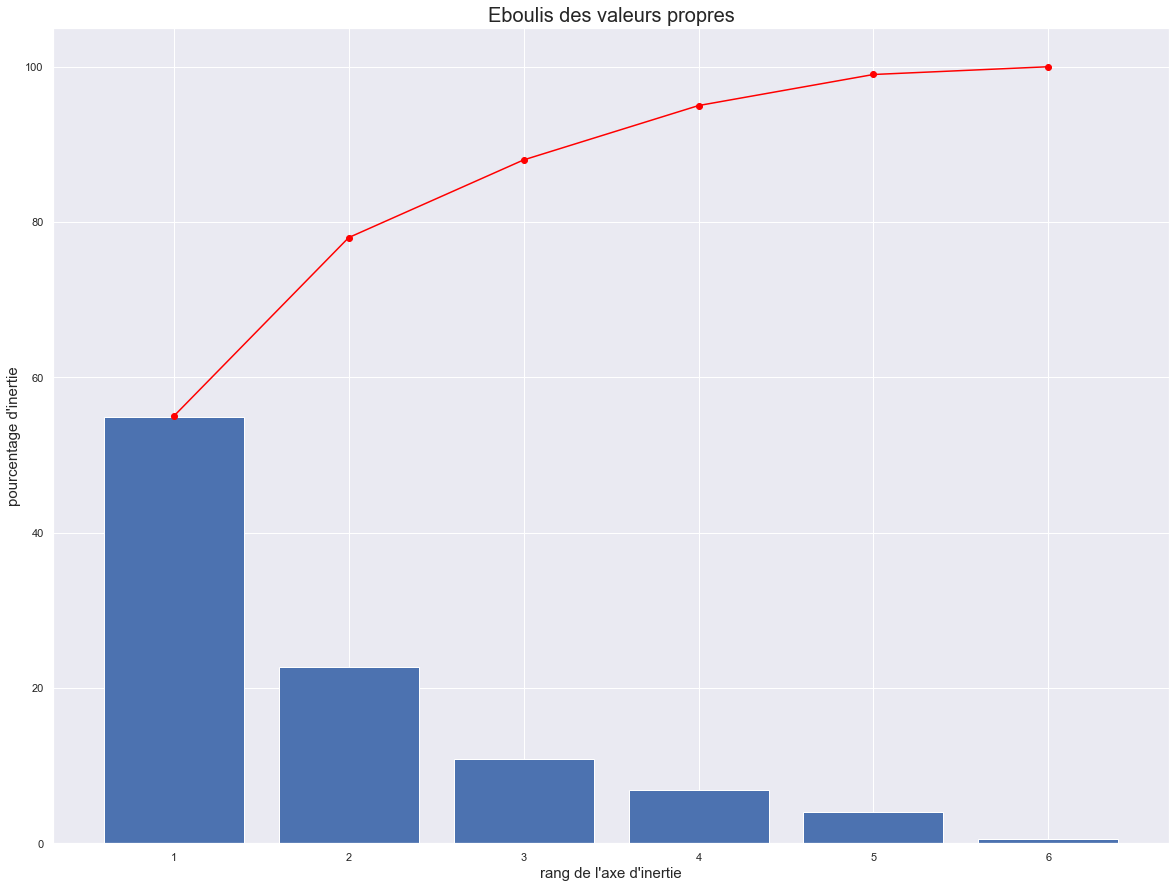

In [99]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie", fontsize = 15)
plt.ylabel("pourcentage d'inertie", fontsize = 15)
plt.title("Eboulis des valeurs propres", fontsize = 20)
plt.savefig('eboulis.png')
plt.show(block=False)

Grâce au diagramme d'eboulis des valeurs propres généré, nous pouvons constater que le nombre de composantes maximales respecte les conditions.

Dans l'idéal, il faut choisir le nombre d'axes d'inertie en fonction de leur pourcentage d'inertie.
Généralement, soit nous nous appuyons sur le critère de Kaiser et dans ce cas nous ne choisirons que les deux premiers axes, de même pour la méthode du coude, soit nous cherchons à atteindre un maximum d'inertie (l'idéal est d'atteindre un minimum de 80%) et dans ce cas nous prennons les trois premiers axes.

Ici, nous avons choisit la troisième option car plus il y a d'inertie, mieux c'est.

## Caractéristiques des axes d'inerties via une carte de chaleur

Nous allons maintenant visualiser les caractéristiques des axes d'inerties via une carte chaleur.

In [100]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)

In [101]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Index,PIB,Population,Export Quantity,Food,Import Quantity,Production
F1,-0.06,0.04,0.47,0.30,0.49,0.44,0.50
F2,0.66,0.70,-0.12,0.23,-0.08,0.11,-0.03
F3,-0.36,0.01,-0.26,0.84,-0.29,-0.11,0.08
F4,-0.65,0.64,-0.04,-0.25,0.00,0.26,-0.18
F5,-0.09,0.31,0.44,-0.02,0.04,-0.80,0.22
F6,-0.04,0.07,-0.67,-0.22,0.24,-0.14,0.65


In [102]:
pcs.T

,F1,F2,F3,F4,F5,F6
Index,-0.056245,0.655325,-0.360015,-0.653707,-0.092665,-0.041410
PIB,0.041657,0.695301,0.005804,0.641249,0.314521,0.068093
Population,0.470355,-0.124452,-0.260817,-0.038079,0.443593,-0.667826
Export Quantity,0.303230,0.228796,0.837716,-0.245409,-0.016132,-0.223508
Food,0.489131,-0.078018,-0.286742,0.002217,0.044571,0.235187
Import Quantity,0.443040,0.111258,-0.111788,0.261389,-0.801926,-0.138253
Production,0.496373,-0.028361,0.076446,-0.177376,0.224460,0.650595


Pour rappel, lors des analyses exploratoires de données, nous n'avons retenu que les trois premiers axes d'inerties (F1, F2 et F3).

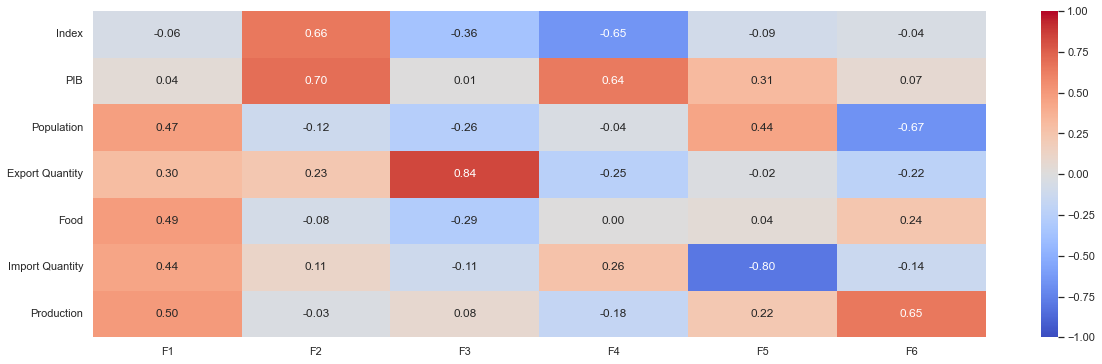

In [103]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.savefig('heatmap_axes.png')

Cette carte de chaleur, ou heatmap, nous montre plusieurs points, à savoir que :

 - F1 est corrélée à toutes les variables sauf les variables Index et PIB
 - F2 est très corrélée aux variables Index et PIB et un peu à la variable Export Quantity
 - F3 est extrèmement corrélée à la variable Export Quantity et est anticorrélée aux variables Index, Population et Food

## Cercle des Corrélations

Avant toute chose, nous allons commencer cette partie en créant une fonction permetant de générer ce graphique pour éviter les nombreuses lignes de codes impliquées.

In [104]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # Titre du cercle
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Ajoute un cercle unité pour l'échelle

    # Axes et display
    plt.axis('equal')
    plt.savefig(f'corr_F{x+1}_F{y+1}')
    plt.show(block=False)

Nous pouvons maintenant générer nos cercles de corrélations avec les trois premiers axes d'inerties retenues, à savoir F1, F2 et F3.

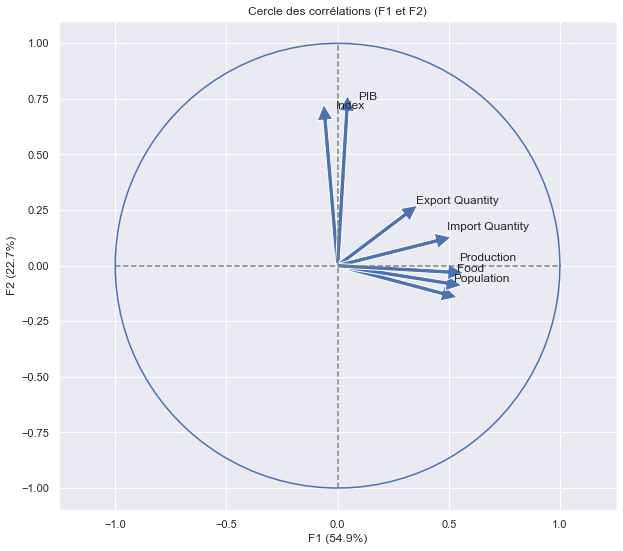

<Figure size 1440x1080 with 0 Axes>

In [105]:
correlation_graph(pca, (0,1), features)
plt.savefig('corr_F1_F2.png')

Avec ce premier cercle de corrélation, nous pouvons nous apercevoir de plusieurs choses :
 - les variables PIB et Index sont fortement corrélées à F2
 - les variables Import Quantity, Production, Food et Population sont corrélées à F1
 - la variable Export Quantity est corrélée à la fois à F1 et à F2
 
 
Nous pouvons essayer d'interpréter F2 comme le fait que plus le PIB par habitant d'un pays et élevé, plus son index de stabilité politique sera élevé également.


Pour F1, nous pouvons interpréter que plus la population d'un pays est grande, plus le pays devra se procurer des ressources alimentaires.

Nous pouvons maintenant passer au second cercle de corrélation.

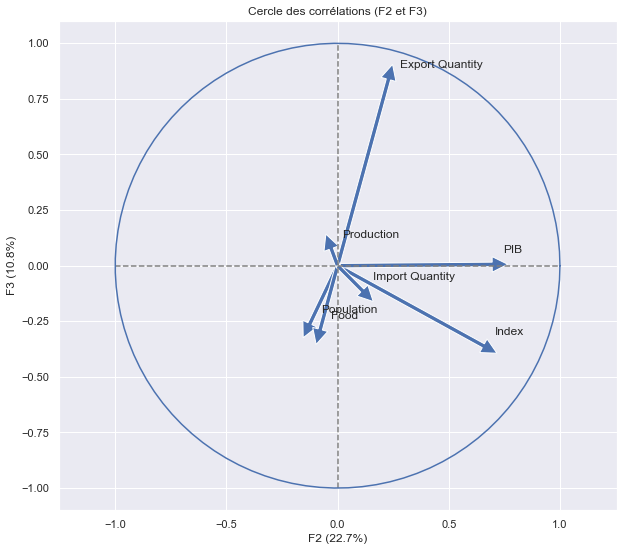

<Figure size 1440x1080 with 0 Axes>

In [106]:
correlation_graph(pca, (1,2), features)
plt.savefig('corr_F2_F3.png')

Avec ce deuxième cercle de corrélation, nous pouvons observer que :
 - les variables Index et PIB sont toujours fortement corrélées à F2
 - la variable Export Quantity est fortement corrélée à F3 
 - les varaibles Population et Food sont faiblement anti-corrélées à F3
 - les variables Production et Import Quantity sont peu corrélées à la fois à F2 et à F3
 
 
L'interprétation de F2 ne change pas.

En ce qui concerne F3, nous pouvons conclure que plus un pays exporte des produits alimentaires, moins il en a besoin pour nourrir sa population et moins sa population est importante. 

## Projection des individus sur un plan factoriel

Pour cette partie également, nous allons commencer par créer une fonction permettant de générer la projection des individus (ici, les pays) sur F1, F2 et F3.

In [107]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}',fontsize = 15)
    ax.set_ylabel(f'F{y+1} {v2}',fontsize = 15)

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center')        

    # Titre, display et enregistrement
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})",fontsize=20)
    plt.savefig(f'proj_F{x+1}_F{y+1}.png')
    plt.show()

Grâce à la commande suivante, nous allons calculer les coordonnées des individus sur ces nouveaux espaces.

In [108]:
X_proj = pca.transform(X_scaled)

Nous pouvons maintenant passer aux projections.

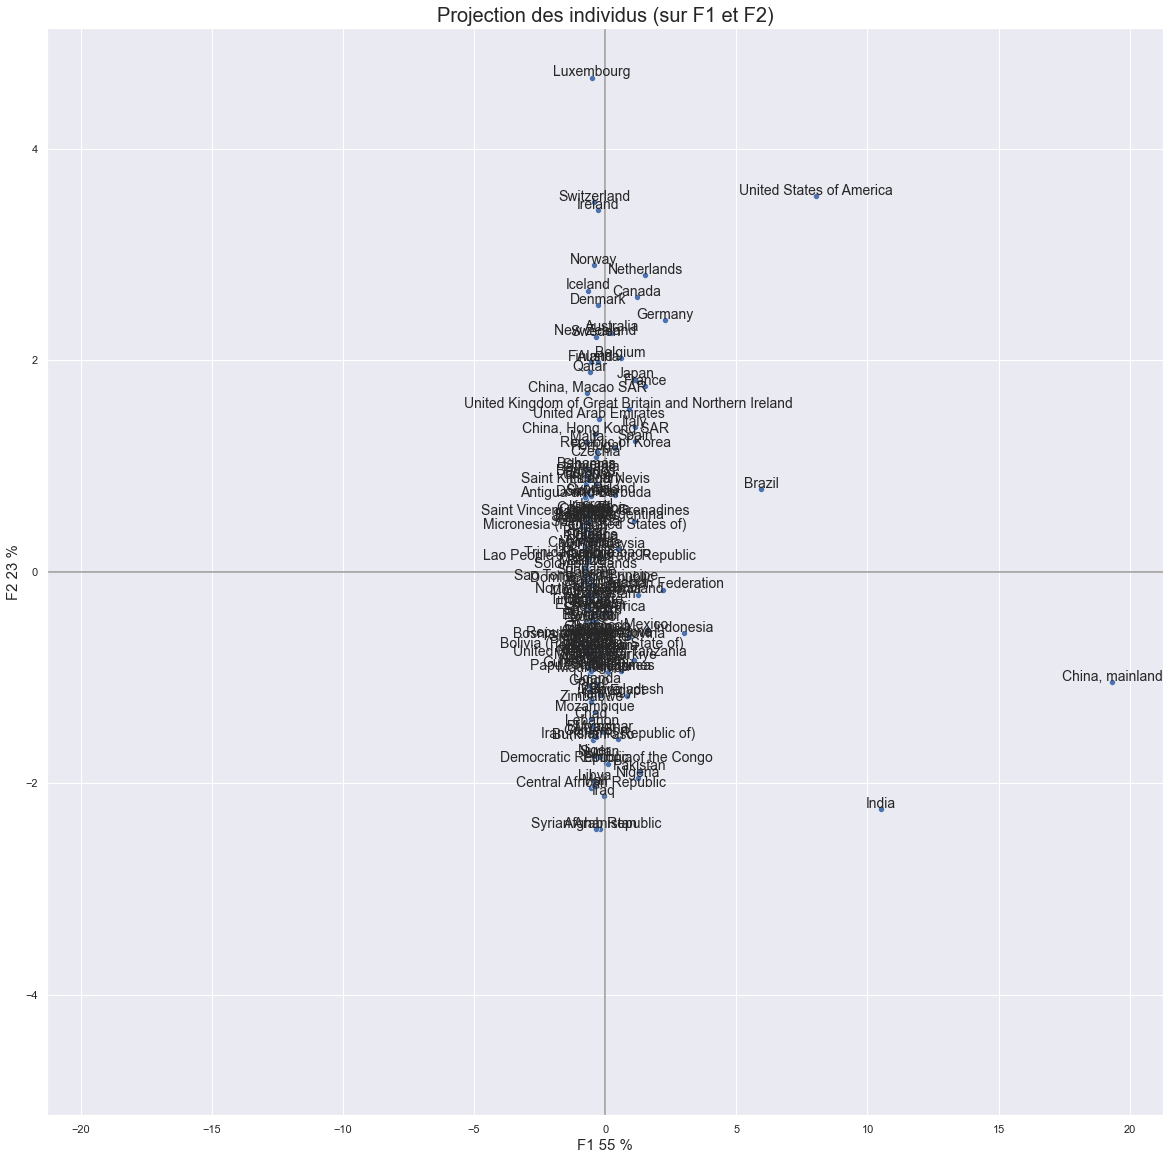

In [109]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,20), marker="o")
plt.show()

Ce que nous pouvons déjà observer sur cette projection est que certains pays semblent plus à l'écart que d'autres à savoir la Chine, l'Inde, le Brésil, les États-Unis et le Luxembourg. Il est interessant de rappeller que quatre de ces pays ont des valeurs extrêmes dans la dataframe 'dispo'.

Il est également important de noter que les pays sont principalement étalés tout le long de F2 et peu étalés sur F1.

Lorsque nous repérons la France, son emplacement nous indique qu'elle possède un index de stabilité politique et un PIB par habitant fort ainsi qu'une population et une procuration des ressources alimentaires un peu plus forte que la moyenne.

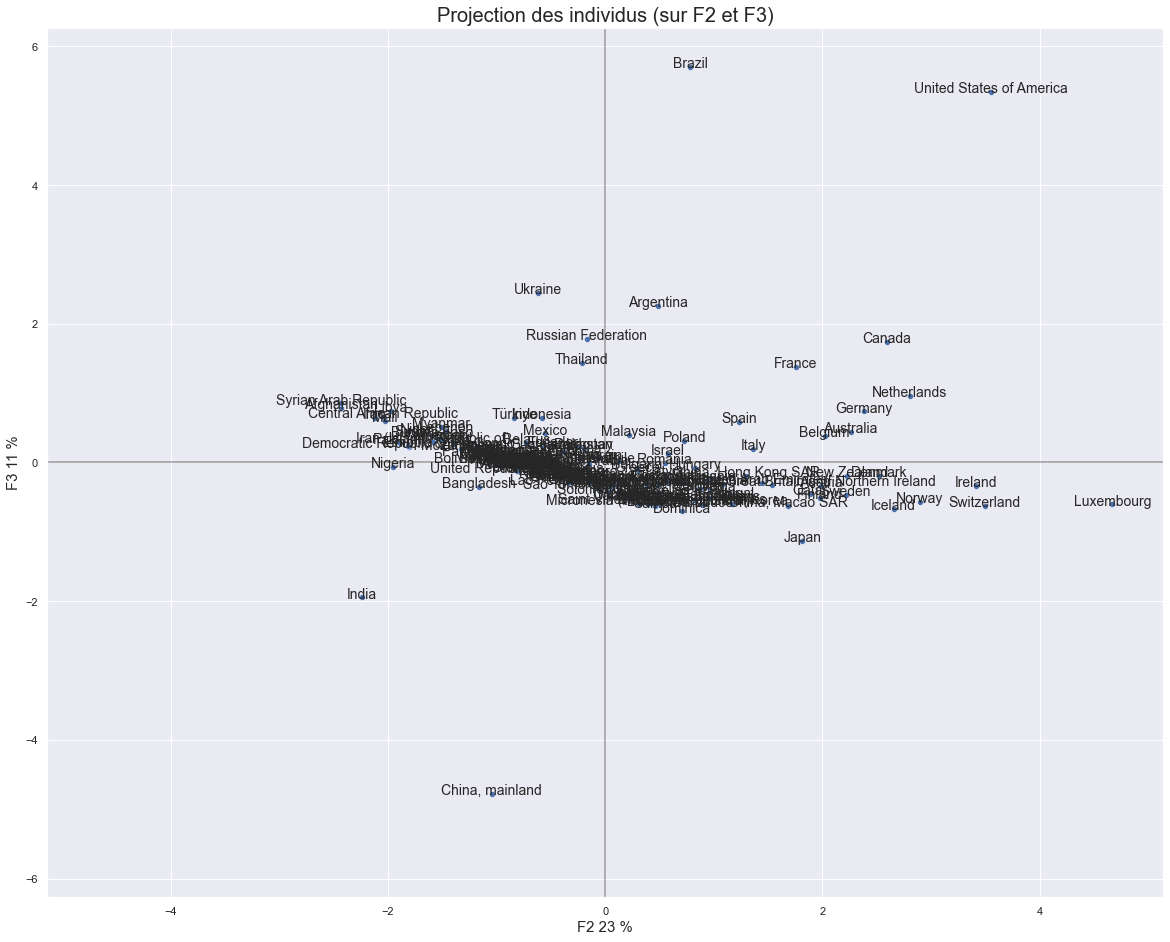

<Figure size 1440x1080 with 0 Axes>

In [110]:
x_y = [1,2]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), marker="o")
plt.savefig('proj_F2_F3.png')

Sur cette dernière projection, nous retrouvons à l'écart la Chine ainsi que les États-Unis et le Brésil. L'Inde semble se rapprocher des autres individus même s'il est toujours à l'écart.

Nous pouvons observer que, comme pour la projection précédente, les individus semblent s'étaler tout le long de l'axe F2 et peu sur l'axe F3.

Ici, nous pouvons aisément retrouver la France.

Son positionnement nous indique toujours un PIB et un index de stabilité politique fort. Il nous indique également que c'est un pays qui a des exports superieurs à la moyenne.

# Analyse exploratoire des données sans les Outliers

Comme nous l'avons vu précédemment, il semble que la Chine, l'Inde, les Etats-Unis et le Brésil possède des valeurs extrêmes en ce qui concerne leurs disponibilités alimentaires.

De plus, les projections précédentes nous ont montrés que ces pays se tenaient à l'écart du reste des projections des autres pays.

De fait, nous allons réaliser une nouvelle analyse cette fois-ci en excluant ces quatres pays.

In [111]:
acp = acp[(acp.index != 'China, mainland')&(acp.index != 'India')&(acp.index != 'Brazil')&(acp.index != 'United States of America')]
acp

,Index,PIB,Population,Export Quantity,Food,Import Quantity,Production
Country,,,,,,,
Afghanistan,-2.73,516.866552,38972230,884.00,15413.20,5390.10,15029.10
Albania,0.08,5332.160475,2866849,188.02,3452.90,849.40,4251.70
Algeria,-0.86,3337.252512,43451666,867.59,34199.59,19064.88,30624.88
Angola,-0.52,1603.993477,33428485,128.10,19862.68,3188.21,24395.70
Antigua and Barbuda,0.93,14787.635775,92664,0.09,56.29,51.32,18.18
...,...,...,...,...,...,...,...
Uruguay,1.05,15619.542656,3429086,6178.33,2624.74,1012.17,10080.94
Uzbekistan,-0.44,1749.655815,33526656,3135.24,33323.93,5459.93,39981.72
Vanuatu,0.90,2877.520173,311685,90.48,191.89,51.10,506.79


## Séparation des données

In [112]:
X = acp.values
names = acp.index
features = acp.columns

## Centrer-Réduire

In [113]:
X_scaled = scaler.fit_transform(X)

In [114]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6
mean,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Analyse en Composantes Principales

In [115]:
n_components = 6
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

PCA(n_components=6)

## Eboulis des valeurs propres

In [116]:
scree = (pca.explained_variance_ratio_*100).round(2)
print(scree)
scree_cum = scree.cumsum().round()

[53.07 25.23  8.38  7.01  5.26  0.65]


In [117]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

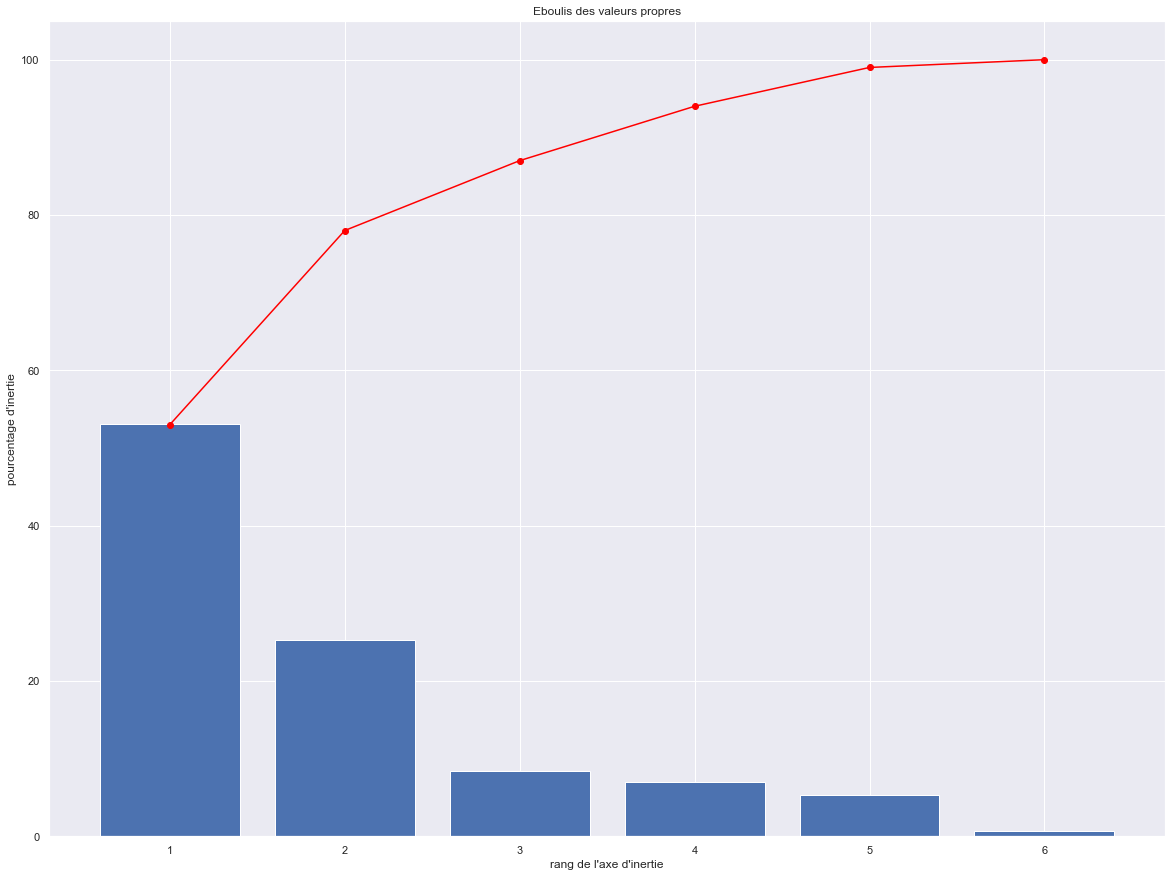

In [118]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.savefig('eboulis_outliers.png')
plt.show(block=False)

Ici aussi, nous choisirons la troisième option (le choix d'atteindre au minimum 80% d'inertie totale), nous permettant de choisir de représenter F1, F2 et F3.

## Caractéristiques des axes d'inerties via une carte de chaleur

Comme précédement, nous allons afficher les caractéristiques des axes d'inerties via une heatmap.

In [119]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)

In [120]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

In [121]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Index,PIB,Population,Export Quantity,Food,Import Quantity,Production
F1,-0.14,0.02,0.47,0.36,0.50,0.38,0.49
F2,0.60,0.64,-0.19,0.31,-0.10,0.29,-0.02
F3,0.11,-0.50,-0.33,0.72,-0.22,-0.17,0.20
F4,0.64,-0.13,0.28,-0.22,0.20,-0.55,0.32
F5,-0.43,0.57,-0.01,0.23,-0.05,-0.62,0.22
F6,-0.07,0.02,-0.41,-0.40,-0.25,0.22,0.75


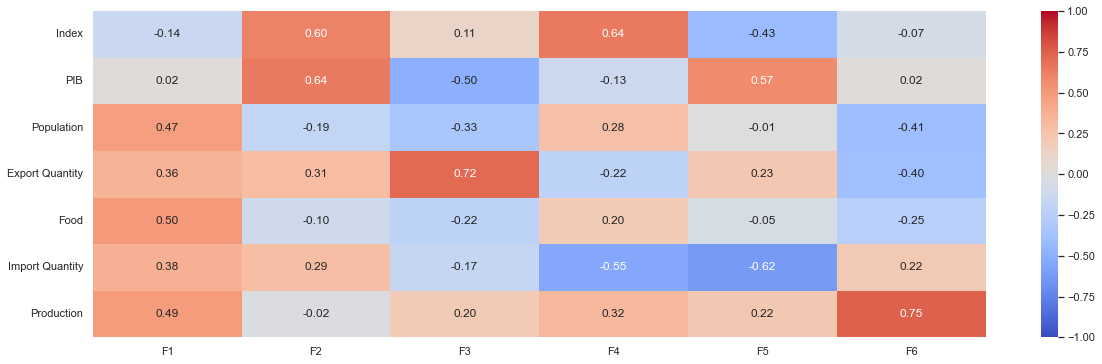

In [122]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.savefig('heatmap_outliers.png')

Cette nouvelle carte nous montre que :

 - F1 est corrélée à toutes les variables sauf les variables Index et PIB 
 - F2 est très corrélée aux variables Index et PIB et un peu aux variables Export Quantity et Import Quantity
 - F3 est extrèmement corrélée à la variable Export Quantity et est anti-corrélée aux variables PIB et Population

## Cercle des corrélations

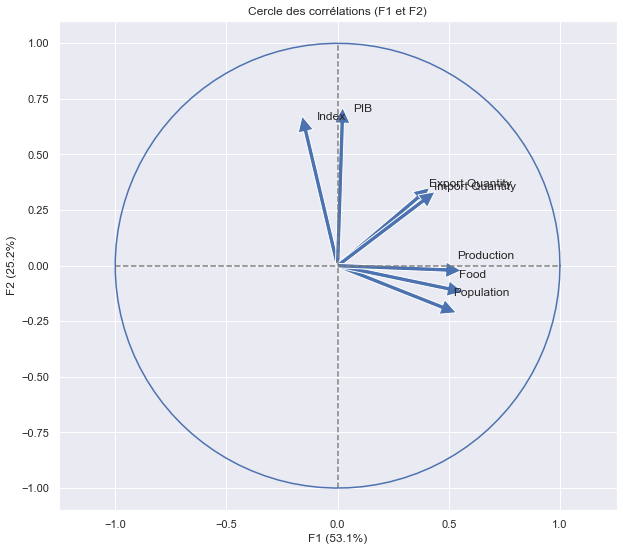

In [123]:
correlation_graph(pca, (0,1), features)

Ici, nous pouvons retrouver les mêmes interprétations en ce qui concerne F2.

Le seul changement est que la variable Import Quantity est autant corrélée à F1 qu'à F2.

Autrement dit, F1 représente que plus une population est grande, plus le pays doit produire des ressources qui servirons de nourriture à sa population. 

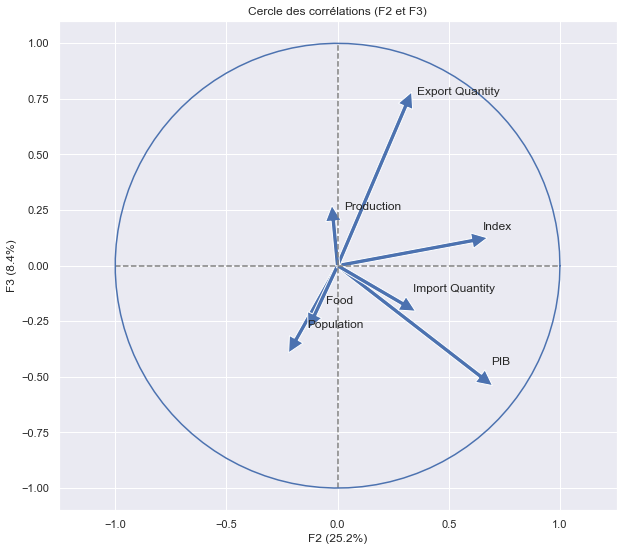

<Figure size 1440x1080 with 0 Axes>

In [124]:
correlation_graph(pca, (1,2), features)
plt.savefig('corr_F2_F3_outliers.png')

Pour ce dernier cercle des corrélations, nous pouvons nous apercevoir que :
 - Import Quantity semble un peu corrélée à F2 tandis que Index est fortement corrélée à F2
 - PIB est fortement corrélée à la fois à F2 et à F3
 - Export Quantity est fortement corrélée à F3 tandis que Production l'est faiblement
 - Food et Population sont anti-corrélées à F3

Autrement dit, F2 représente d'avantage l'index et le PIB d'un pays et F3 représente les exportations de produits alimentaires qu'un pays peut se permettre si sa population est peu grande et donc son besoin en nourriture est peu importante.

## Projection des individus sur un plan factoriel

In [125]:
X_proj = pca.transform(X_scaled)

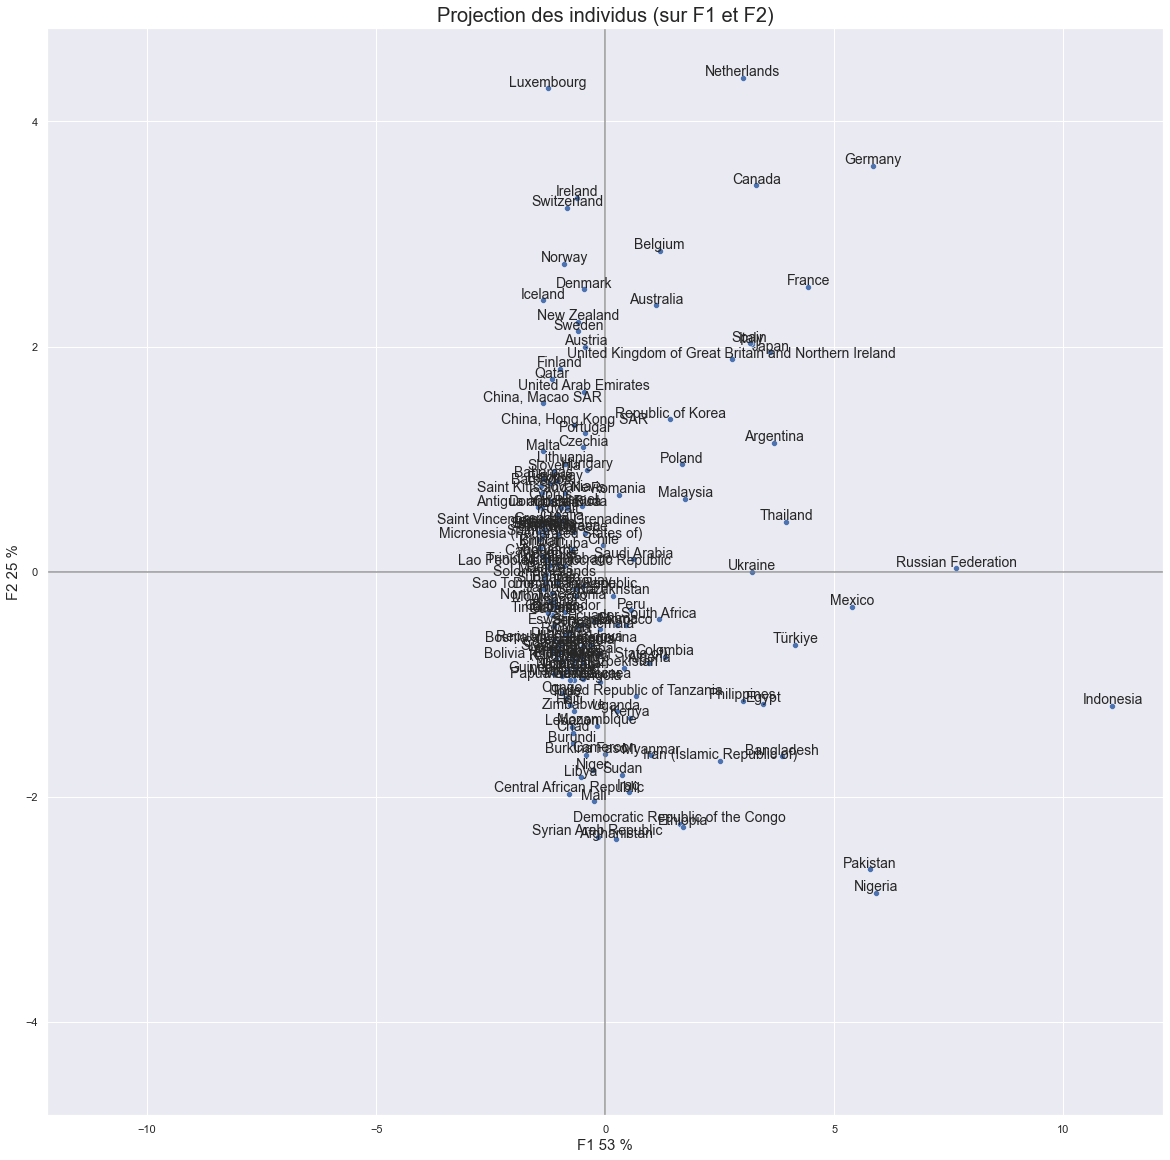

In [126]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,20), marker="o")

Avec cette nouvelle projection, nous pouvons constater que les individus semblent s'étaler le long de F2 mais il semble également qu'ils s'étalent bien plus sur F1.

Quand nous regardons la France, nous pouvons conclure que :
 - c'est un pays avec un fort index de stabilité politique et un fort PIB par habitant
 - elle possède une population supérieure à la moyenne et a sa production de ressources ainsi que sa nourriture pour sa population.

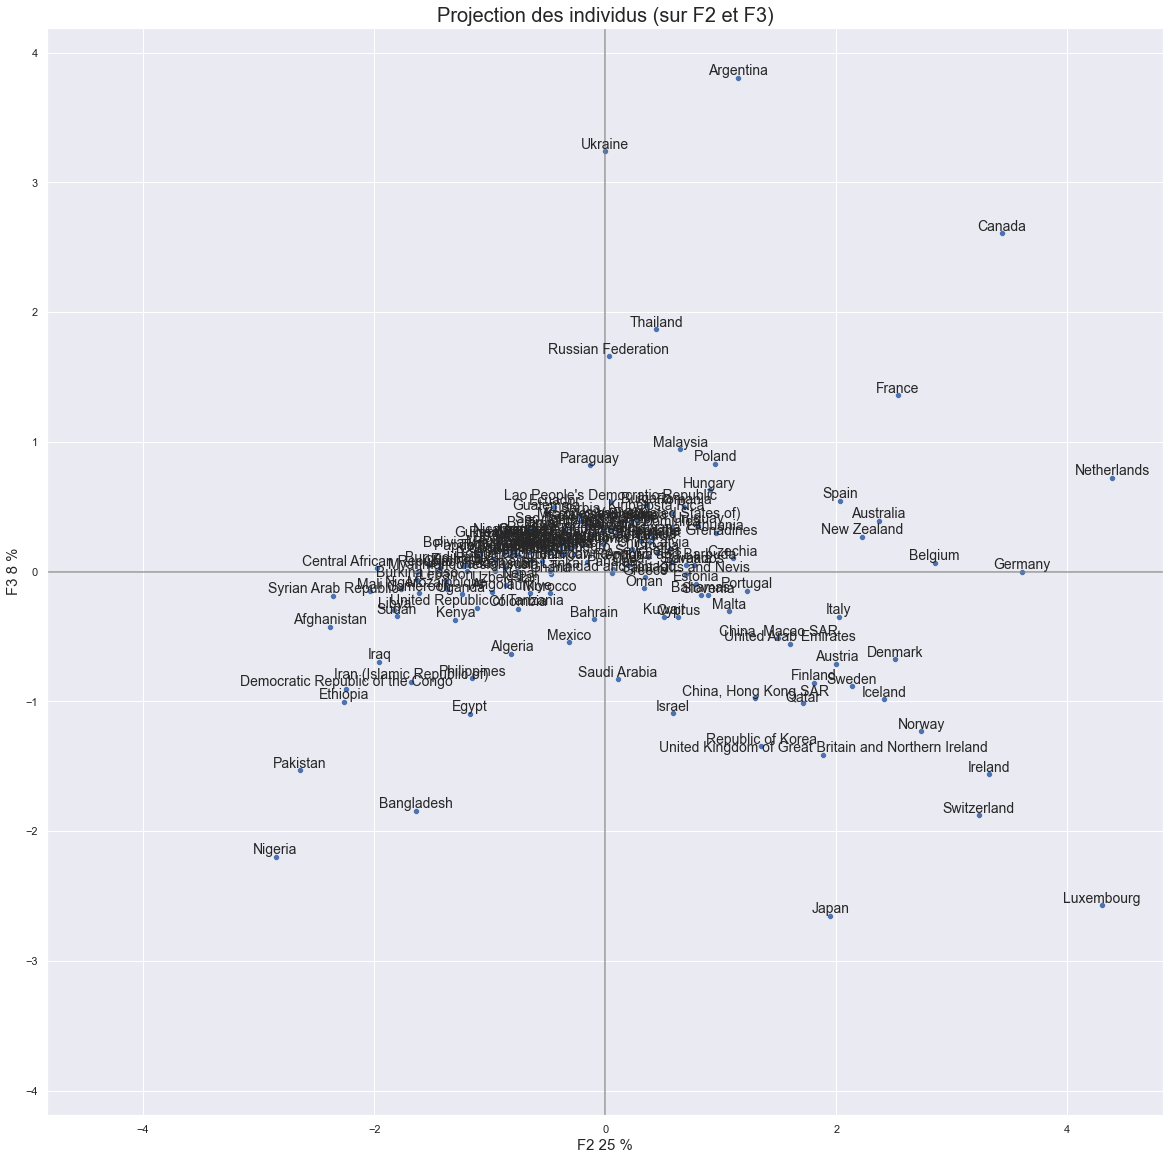

<Figure size 1440x1080 with 0 Axes>

In [127]:
x_y = [1,2]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,20), marker="o")
plt.savefig('proj_F2_F3_outliers.png')

Cette dernière projection nous montre les individus positionnés un peu partout sur le plan bien qu'il y en ait beaucoup qui soit concentré près du centre du plan.

En repérant la France, nous pouvons arriver aux mêmes conclusion pour son Index et son PIB que pour la précédente projection.

Nous pouvons également conclure que c'est un pays qui a un fort export de ressources alimentaires.

# Analyse exploratoire des données pour l'exportation des poulets

Nous allons maintenant réaliser les analyses demandées afin de réaliser le groupement de pays où nous pourrions exporter les poulets.

In [128]:
dispo_p = dispo[dispo['Item']=='Poultry Meat']
dispo_p = dispo_p.loc[:,['Country','Element','Quantity']]
dispo_p

,Country,Element,Quantity
927,Afghanistan,Production,28.0
928,Afghanistan,Import Quantity,36.0
930,Afghanistan,Export Quantity,0.0
933,Afghanistan,Food,67.0
1996,Albania,Production,14.0
...,...,...,...
233485,Zambia,Export Quantity,9.0
233488,Zambia,Food,49.0
234827,Zimbabwe,Production,67.0
234828,Zimbabwe,Import Quantity,1.0


In [129]:
dispo_p = dispo_p.pivot(index = 'Country',columns='Element', values='Quantity')
dispo_p = dispo_p.reset_index()

In [130]:
acp = pd.merge(data[data['Year']==2020],dispo_p)
acp 

,Country,Year,Index,PIB,Population,Export Quantity,Food,Import Quantity,Production
0,Afghanistan,2020,-2.73,516.866552,38972230,0.0,67.0,36.0,28.0
1,Albania,2020,0.08,5332.160475,2866849,NaN,40.0,26.0,14.0
2,Algeria,2020,-0.86,3337.252512,43451666,1.0,280.0,0.0,284.0
3,Angola,2020,-0.52,1603.993477,33428485,NaN,276.0,224.0,52.0
4,Antigua and Barbuda,2020,0.93,14787.635775,92664,0.0,6.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...
170,Uzbekistan,2020,-0.44,1749.655815,33526656,0.0,104.0,44.0,66.0
171,Vanuatu,2020,0.90,2877.520173,311685,NaN,4.0,4.0,1.0
172,Zambia,2020,-0.13,956.831364,18927715,9.0,49.0,21.0,52.0
173,Zimbabwe,2020,-1.08,1372.696674,15669666,NaN,69.0,1.0,67.0


In [131]:
acp = acp.set_index('Country')
acp = acp.drop(['Year'], axis=1)
acp = acp.fillna(0)
acp

,Index,PIB,Population,Export Quantity,Food,Import Quantity,Production
Country,,,,,,,
Afghanistan,-2.73,516.866552,38972230,0.0,67.0,36.0,28.0
Albania,0.08,5332.160475,2866849,0.0,40.0,26.0,14.0
Algeria,-0.86,3337.252512,43451666,1.0,280.0,0.0,284.0
Angola,-0.52,1603.993477,33428485,0.0,276.0,224.0,52.0
Antigua and Barbuda,0.93,14787.635775,92664,0.0,6.0,6.0,0.0
...,...,...,...,...,...,...,...
Uzbekistan,-0.44,1749.655815,33526656,0.0,104.0,44.0,66.0
Vanuatu,0.90,2877.520173,311685,0.0,4.0,4.0,1.0
Zambia,-0.13,956.831364,18927715,9.0,49.0,21.0,52.0


In [132]:
acp.to_csv('acp_volaille.csv')

## Séparation des données

In [133]:
X = acp.values
names = acp.index
features = acp.columns

## Centrer-Réduire

In [134]:
X_scaled = scaler.fit_transform(X)

In [135]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6
mean,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Initialisation de l'analyse en composante principale

In [136]:
n_components = 6
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

PCA(n_components=6)

## Eboulis des valeurs propres

In [137]:
scree = (pca.explained_variance_ratio_*100).round(2)
print(scree)
scree_cum = scree.cumsum().round()

[47.33 22.51 13.9   7.66  6.34  2.25]


In [138]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

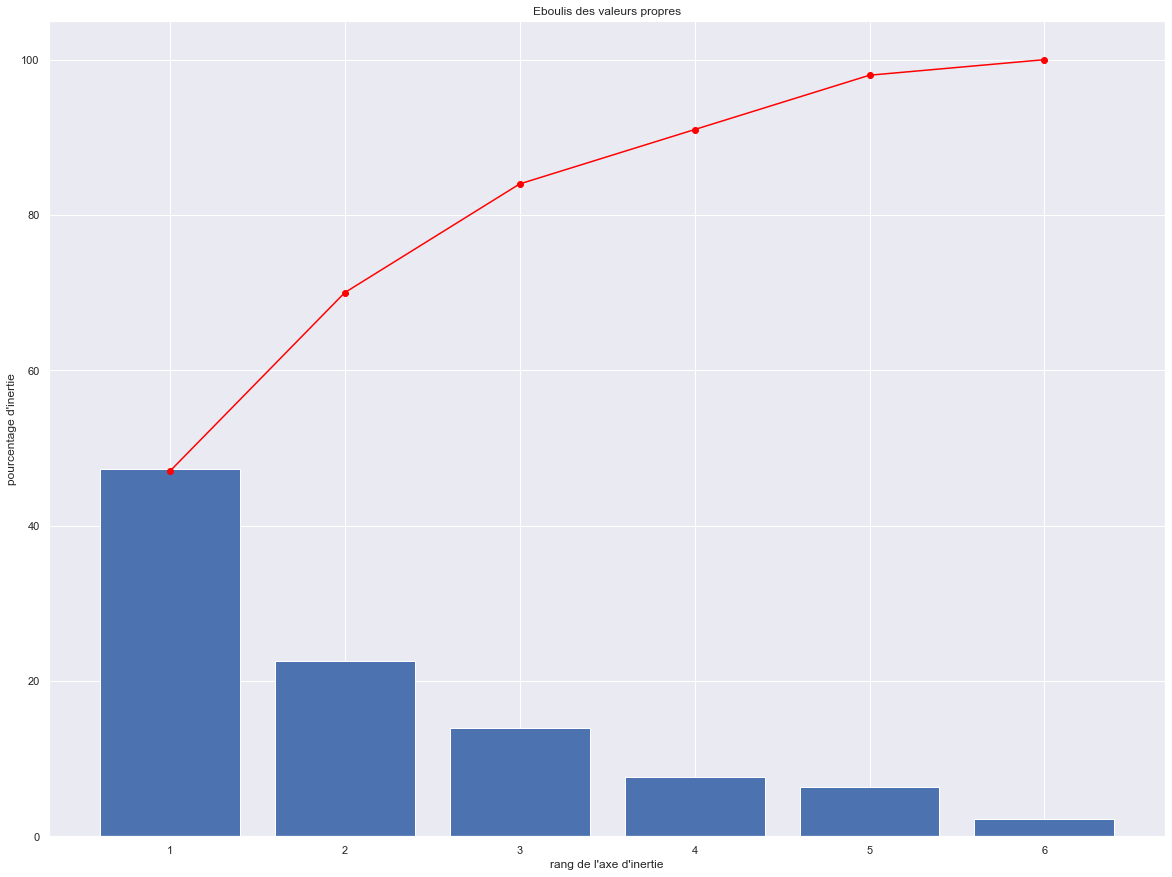

In [139]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.savefig('eboulis_poulet.png')
plt.show(block=False)

De même que pour les deux diagrammes eboulis précédents, nous choisirons la troisième option (le choix d'atteindre au minimum 80% d'inertie totale), nous permettant de choisir de représenter F1, F2 et F3.

## Caractéristiques des axes d'inerties via une carte de chaleur

In [140]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)

In [141]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Index,PIB,Population,Export Quantity,Food,Import Quantity,Production
F1,-0.02,0.11,0.40,0.39,0.54,0.32,0.53
F2,0.68,0.67,-0.22,0.08,-0.06,0.14,-0.05
F3,-0.03,-0.03,-0.39,0.64,0.04,-0.64,0.18
F4,0.56,-0.24,0.55,-0.20,0.07,-0.53,0.06
F5,-0.47,0.69,0.37,-0.14,-0.05,-0.38,-0.05
F6,0.03,-0.06,0.45,0.60,-0.51,0.19,-0.37


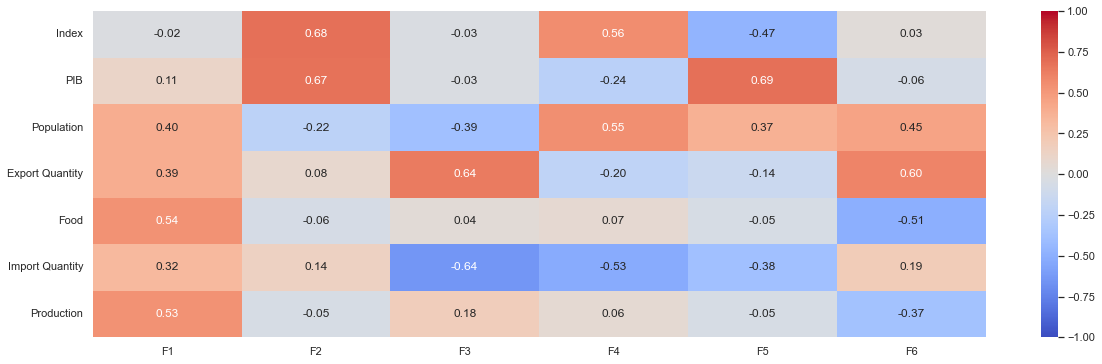

In [142]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.savefig('heatmap_poulet.png')

Cette troisème carte nous montre que :

 - F1 est corrélée à toutes les variables sauf les variables Index et PIB; elle est plus fortement corrélée à Food et Production que les autres variables corrélées
 - F2 est très corrélée aux variables Index et PIB et un peu-anticorrélée à la variable Population
 - F3 est très corrélée à la variable Export Quantity et est très anti-corrélée à la variable Import Quantity et anti-corrélée à la variable Population.

## Cercle des corrélations

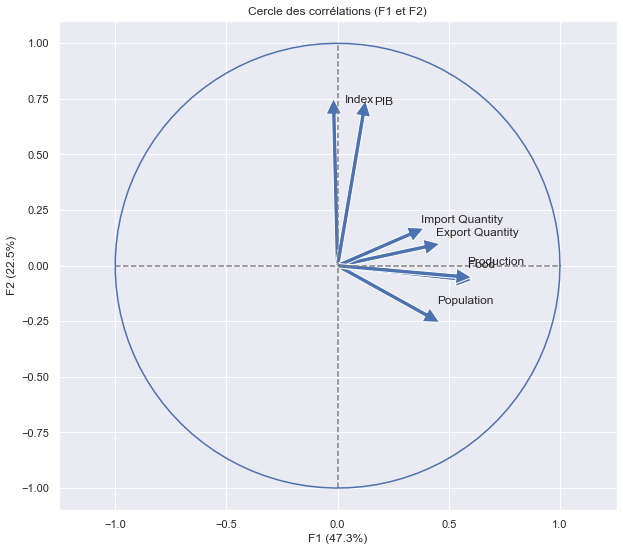

In [143]:
correlation_graph(pca, (0,1), features)

Ce cercle nous confirme les relations entre les axes d'inerties et les variables vues précédemment :
 - F1 représente l'Index et le PIB
 - F2 représente d'avantage la Production et le Food que les trois dernières variables

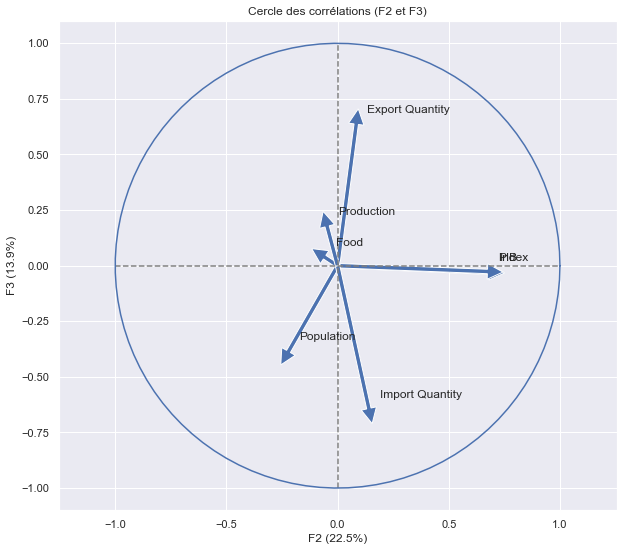

In [144]:
correlation_graph(pca, (1,2), features)

Ici également, nous arrivons aux mêmes conclusions qu'avec la carte de chaleur :
 - F2 représente Export Quantity tandis que Import Quantity et Population lui sont anti-corrélées
 - F3 représente PIB et Index

## Projection des individus sur un plan factoriel

In [145]:
X_proj = pca.transform(X_scaled)

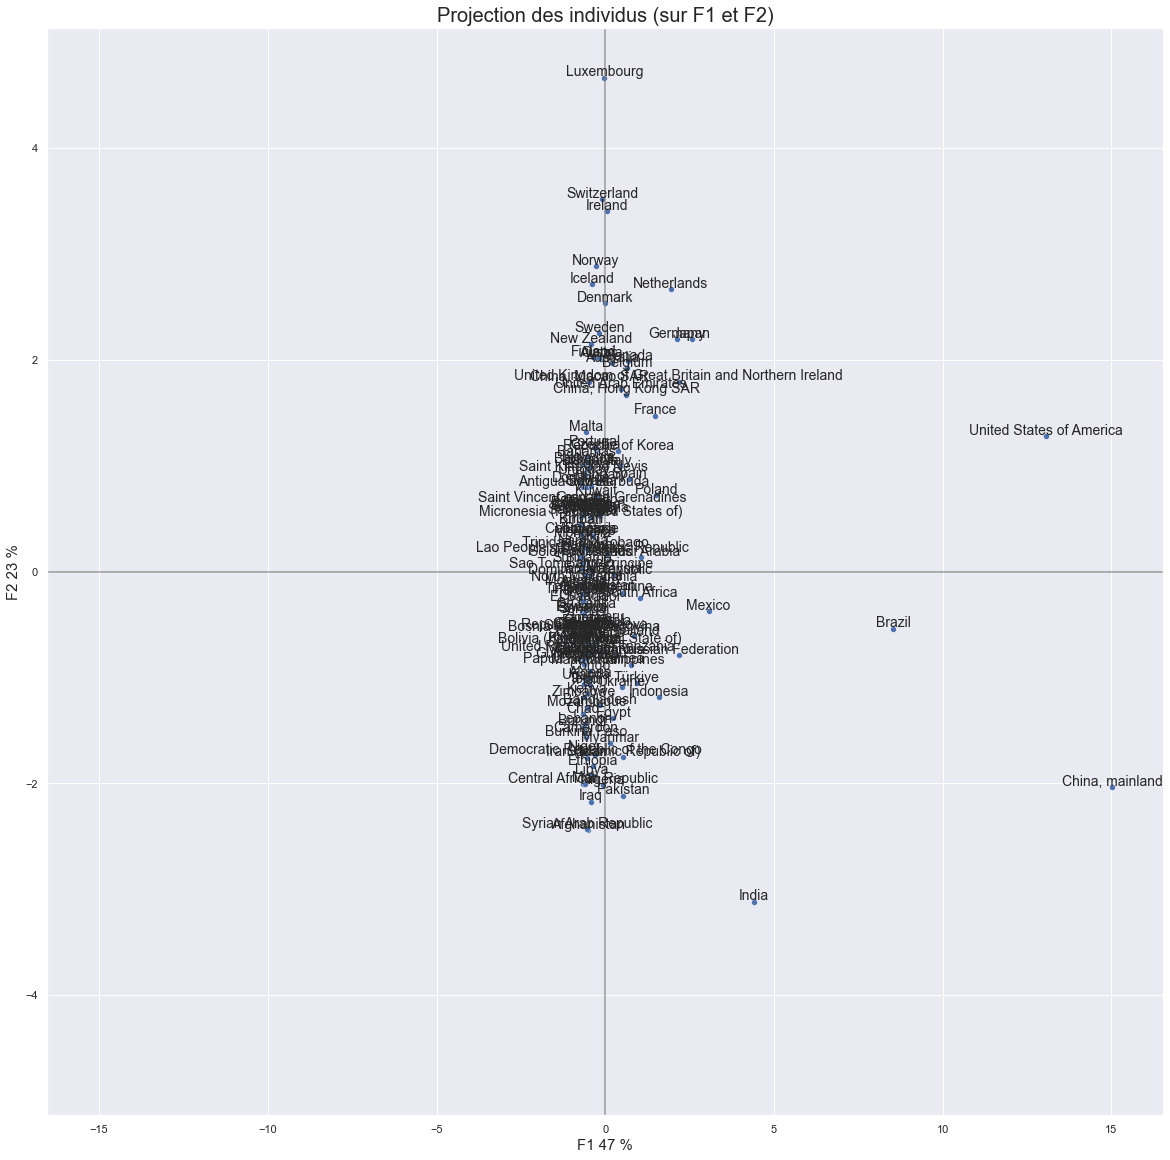

In [146]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,20), marker="o")

Avec cette nouvelle projection, nous pouvons constater que les individus semblent s'étaler le long de F2 mais il semble également qu'ils s'étalent bien plus sur F1 malgré quelques exceptions.

Cinq pays sont à l'ecart du reste, nous allons exclure quatre de ces pays également pour les analyses demandées (Chine, Inde, Brésil et USA)

Quand nous regardons la France, nous pouvons conclure que :
 - c'est un pays avec un fort index de stabilité politique et un fort PIB par habitant
 - elle a une Production ainsi que de la nourriture (ici de la viande de volaille) un peu supérieures à la moyenne.

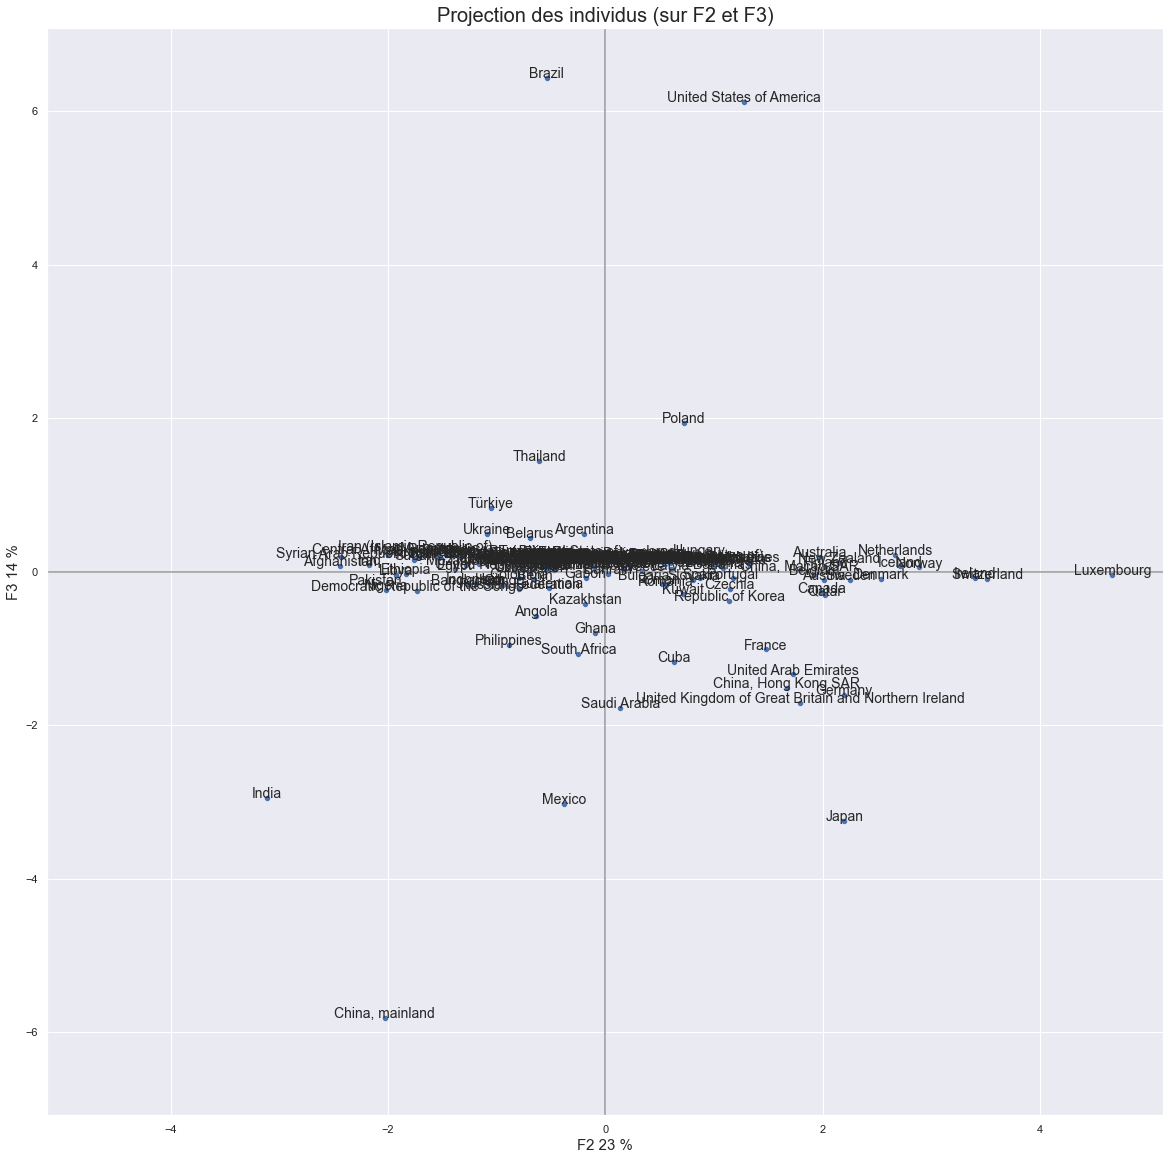

In [147]:
x_y = [1,2]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,20), marker="o")

Cette dernière projection nous montre les individus positionnés un peu partout sur le plan bien qu'il y en a beaucoup qui soit concentré tout le long de F3.

Nous repérons six pays à l'écart des autres, dont les quatre avec des valeurs extrêmes dans la dataframe 'dispo'.

En repérant la France, nous pouvons arriver aux mêmes conclusion pour son Index et son PIB que pour la précédente projection.

Nous pouvons également conclure que c'est un pays qui a une population au-dessus de la moyenne de même que pour l'importation de viande de volaille. En revanche, ses exportations de viande de volaille sont en-dessous de la moyenne.

# Analyse exploratoire des données pour l'exportation des poulets sans les Outliers

Comme précédement, nous allons exclure les quatre pays ayant des outliers.

In [148]:
acp = acp[(acp.index != 'China, mainland')&(acp.index != 'India')&(acp.index != 'Brazil')&(acp.index != 'United States of America')]
acp

,Index,PIB,Population,Export Quantity,Food,Import Quantity,Production
Country,,,,,,,
Afghanistan,-2.73,516.866552,38972230,0.0,67.0,36.0,28.0
Albania,0.08,5332.160475,2866849,0.0,40.0,26.0,14.0
Algeria,-0.86,3337.252512,43451666,1.0,280.0,0.0,284.0
Angola,-0.52,1603.993477,33428485,0.0,276.0,224.0,52.0
Antigua and Barbuda,0.93,14787.635775,92664,0.0,6.0,6.0,0.0
...,...,...,...,...,...,...,...
Uruguay,1.05,15619.542656,3429086,1.0,73.0,8.0,70.0
Uzbekistan,-0.44,1749.655815,33526656,0.0,104.0,44.0,66.0
Vanuatu,0.90,2877.520173,311685,0.0,4.0,4.0,1.0


## Séparation des données

In [149]:
X = acp.values
names = acp.index
features = acp.columns

## Centrer-Réduire

In [150]:
X_scaled = scaler.fit_transform(X)

In [151]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6
mean,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Initialisation de l'analyse en composante principale

In [152]:
n_components = 6
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

PCA(n_components=6)

## Eboulis des valeurs propres

In [153]:
scree = (pca.explained_variance_ratio_*100).round(2)
print(scree)
scree_cum = scree.cumsum().round()

[43.77 25.54 11.21  8.34  7.03  4.08]


In [154]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

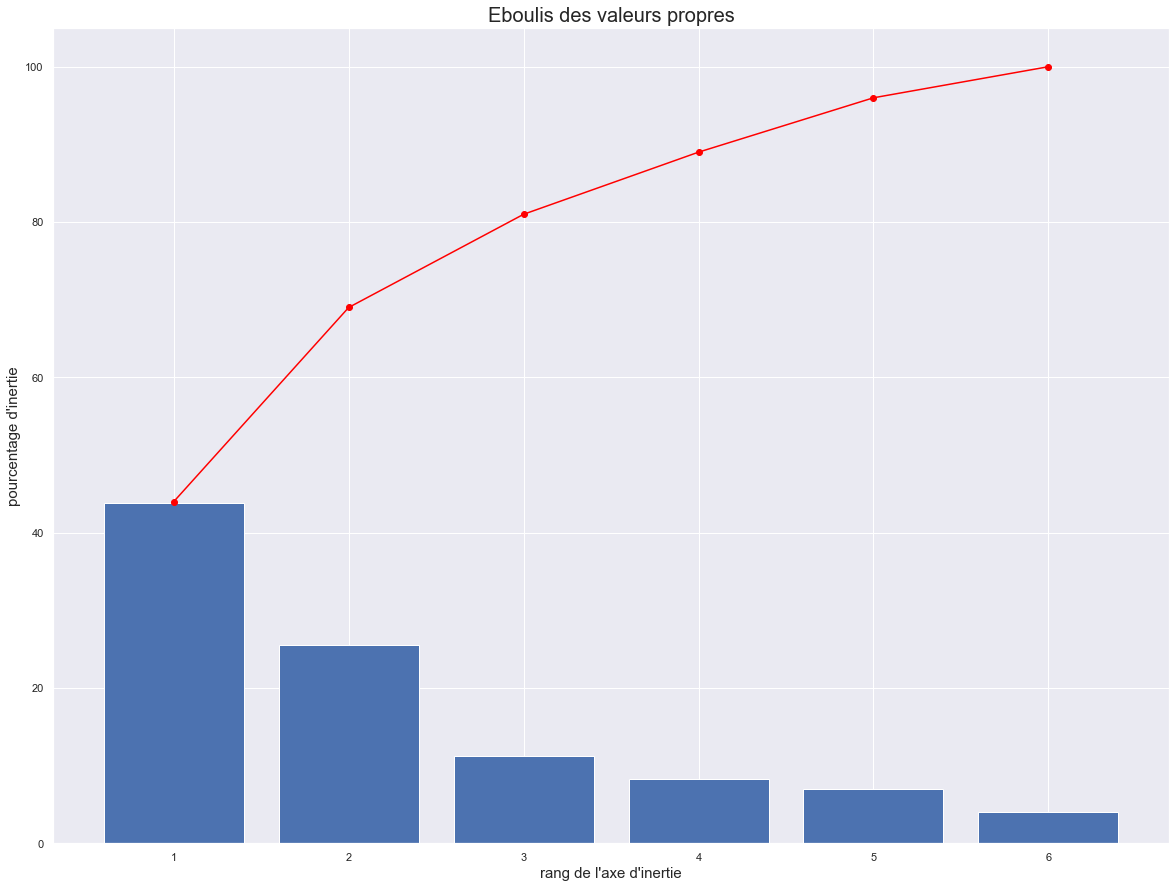

In [155]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie",fontsize=15)
plt.ylabel("pourcentage d'inertie",fontsize=15)
plt.title("Eboulis des valeurs propres",fontsize=20)
plt.savefig('eboulis_poulet.png')
plt.show(block=False)

Ce diagramme nous montre qu'en théorie, nous pouvons nous arrêter à F3.

Nous verrons plus tard que nous arrêterons à F4.

## Caractéristiques des axes d'inerties via une carte de chaleur

In [156]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)

In [157]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Index,PIB,Population,Export Quantity,Food,Import Quantity,Production
F1,-0.09,0.08,0.44,0.27,0.54,0.37,0.54
F2,0.62,0.61,-0.29,0.28,-0.05,0.27,-0.03
F3,-0.23,-0.20,-0.15,0.90,-0.24,-0.15,0.01
F4,0.30,0.20,0.28,0.05,0.09,-0.84,0.27
F5,-0.56,0.70,0.32,0.01,-0.23,-0.02,-0.22
F6,0.40,-0.23,0.72,0.11,-0.34,0.19,-0.33


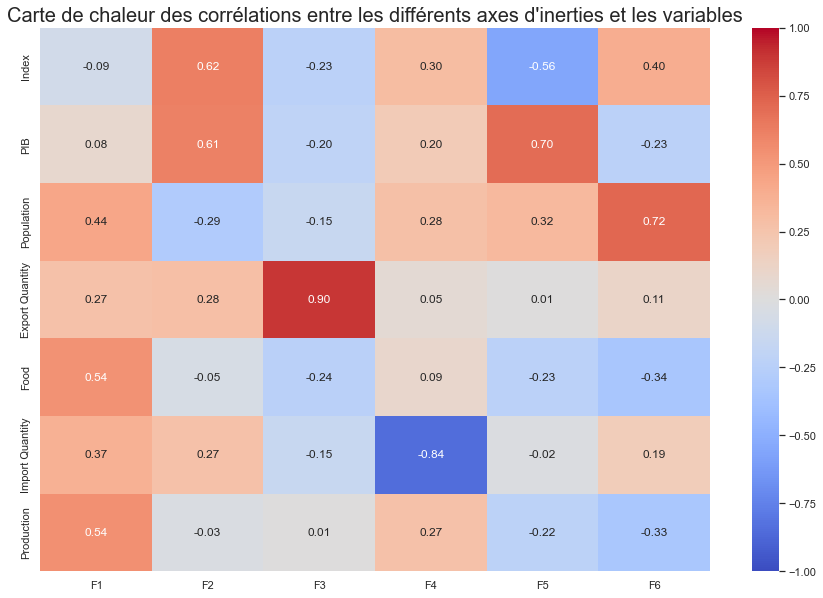

In [158]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.title('Carte de chaleur des corrélations entre les différents axes d\'inerties et les variables',fontsize=20)
plt.savefig('heatmap_poulet.png')
plt.show()

Cette carte nous montre que :
- F1 représentera d'avantage la Population, la Nourriture et la Production
- F2 représentera d’avantage l’Index et le PIB
- F3 représentera fortement les Exportations
- Les importations sont représentées à la fois par F1 et par F2

## Cercle des corrélations

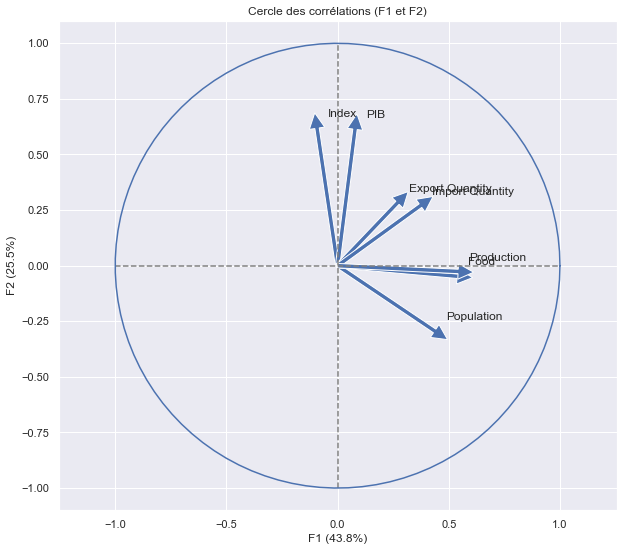

In [159]:
correlation_graph(pca, (0,1), features)

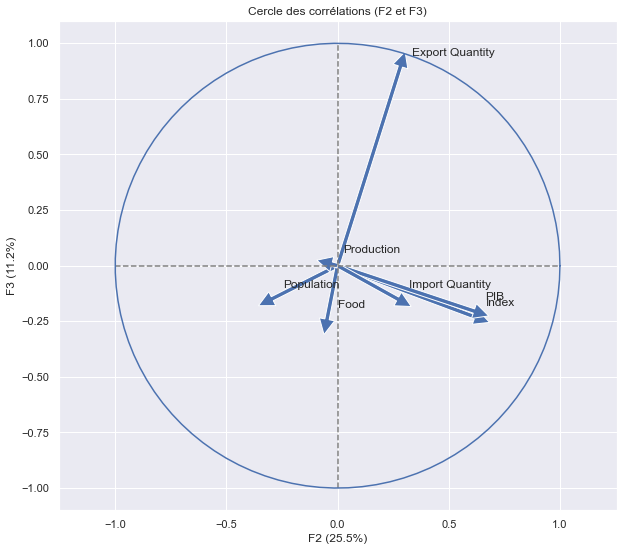

In [160]:
correlation_graph(pca, (1,2), features)

Ces trois cercles confirment nos conclusions via la carte de chaleur.

## Projection des individus sur un plan factoriel

In [161]:
X_proj = pca.transform(X_scaled)

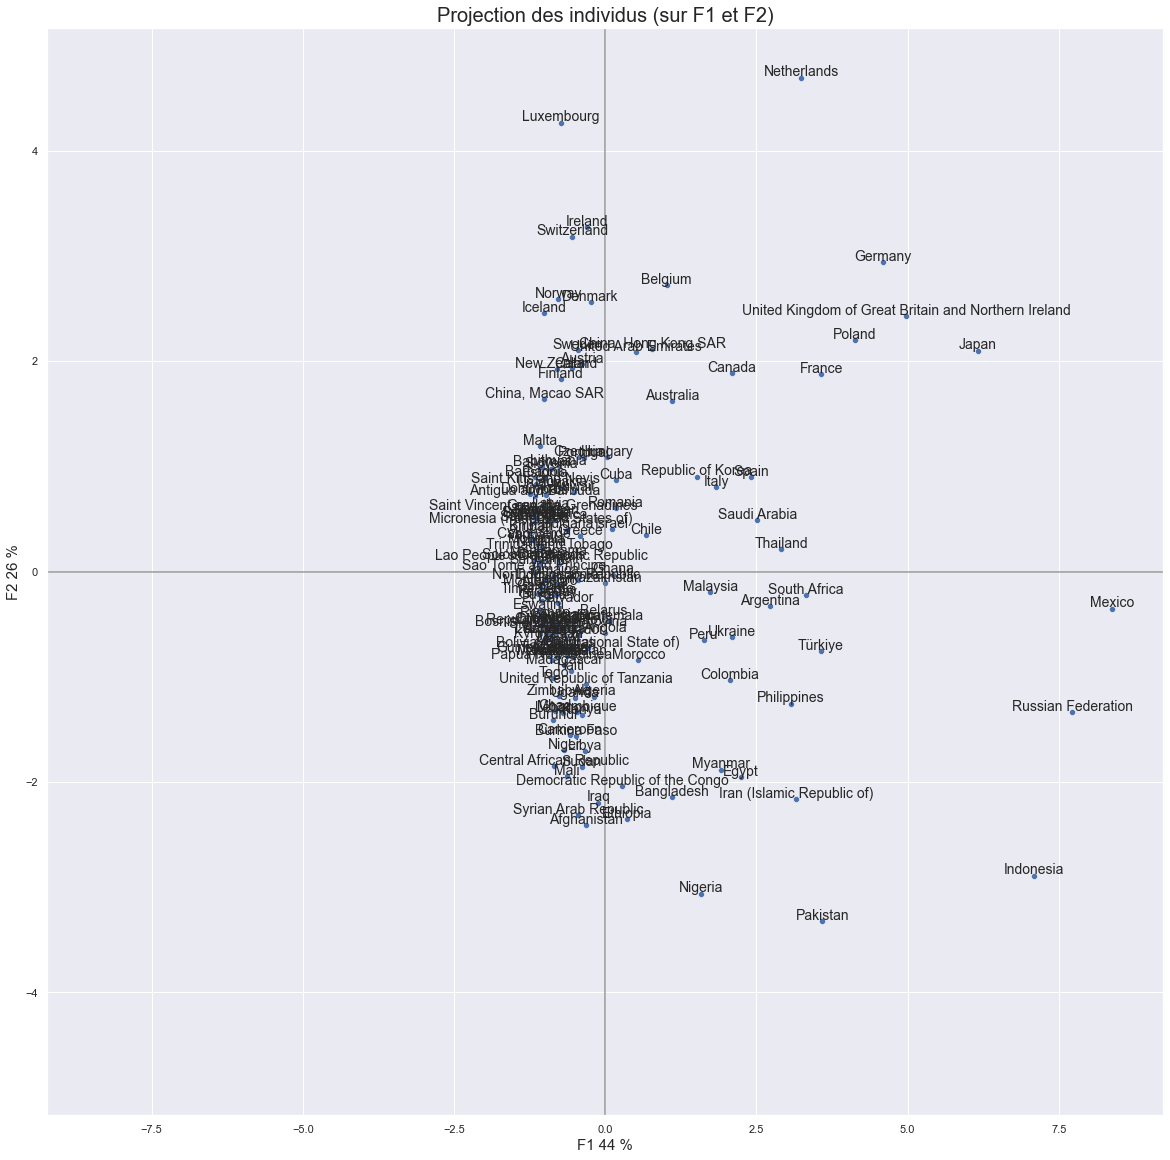

In [162]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,20), marker="o")

Ici, nous retrouvons la France ayant un fort PIB et index de stabilité politique, de même avec la Population, la nourriture et la production.

Elle est proche du Canada et de la Pologne.

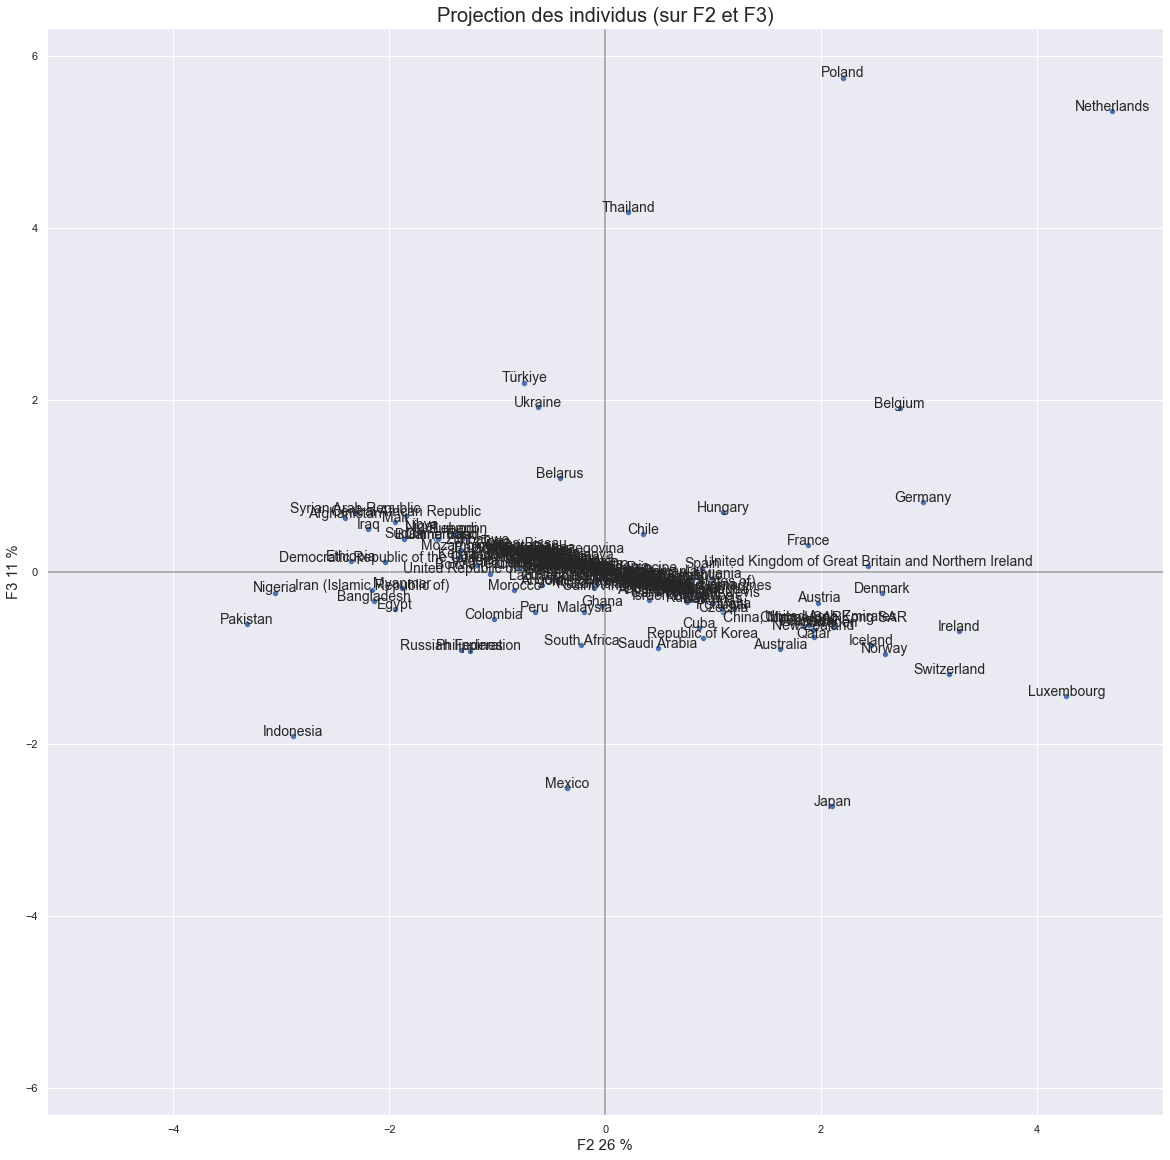

In [163]:
x_y = [1,2]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,20), marker="o")

Le positionnement de la France nous indique qu'elle a des exportations moyennes.

Ceci conclut ce premier notebook.